# This notebook is for Mahalanobis distance (single sensor at a time) results on train & two test sets (normal & faulty vehicle) for smooth road surface

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import math
import csv

# Import and read train (subset of Feb - normal vehicle) set

In [117]:
data_vib1 = pd.read_csv("Input_Data_Files/SmoothDataTrain.csv", index_col=0)
data_vib1

FR_LH [m/s2]  FR_RH [m/s2]  RR_LH [m/s2]  \
DateTime                                                            
2020-02-25 16:44:05.545      0.100473      0.292175     -1.257048   
2020-02-25 16:44:05.550      0.751109      0.805315     -1.192182   
2020-02-25 16:44:05.555     -0.395714     -0.780379     -1.384547   
2020-02-25 16:44:05.560     -1.351551     -0.489236     -1.609597   
2020-02-25 16:44:05.565     -0.074189     -0.203695     -1.431848   
...                               ...           ...           ...   
2020-02-25 15:22:49.850      0.165165     -0.074006     -0.535016   
2020-02-25 15:22:49.855     -0.223721      0.647041     -0.746756   
2020-02-25 15:22:49.860      0.817461      0.130095     -0.769459   
2020-02-25 15:22:49.865      1.196808      1.338246     -0.712049   
2020-02-25 15:22:49.870      0.696986      0.894795     -0.485566   

                         RR_RH [m/s2]  Cabin [m/s2]  
DateTime                                             
2020-02-25 16:44:05.545     -2.306725      0.057444  
2020-02-25 16:44:05.550     -2.509827     -0.368753  
2020-02-25 16:44:05.555     -2.121707     -1.137764  
2020-02-25 16:44:05.560     -2.620094     -0.982462  
2020-02-25 16:44:05.565     -2.502993      0.066187  
...                               ...           ...  
2020-02-25 15:22:49.850      1.069233      0.866391  
2020-02-25 15:22:49.855      0.860075      0.863193  
2020-02-25 15:22:49.860      0.078495      0.577989  
2020-02-25 15:22:49.865      0.262588     -0.092126  
2020-02-25 15:22:49.870     -0.163781      0.232745  

[105928 rows x 5 columns]

array([<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>], dtype=object)

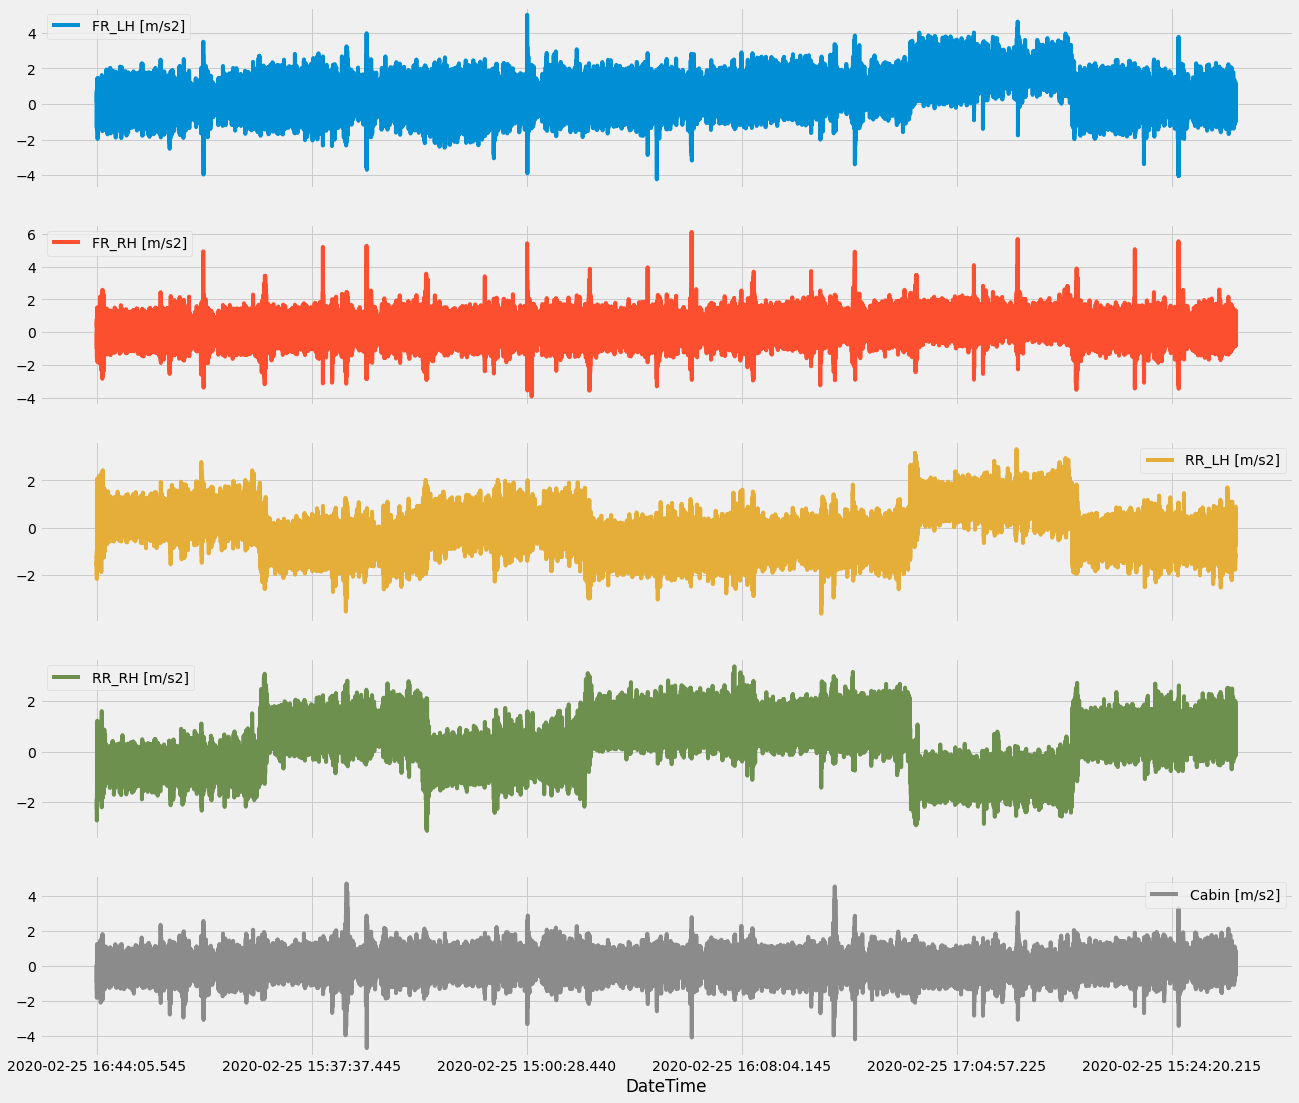

In [118]:
plt.style.use('fivethirtyeight')
data_vib1.plot(figsize=(20,18), subplots=True)

# Time domain feature extraction (7 features) function

In [5]:
def time_domain_features(test1,w,overlap):
    columns = test1.columns
    for c in range (len(columns)):
        for i in range(0,test1.shape[0]-(w-1),overlap):
            test1.loc[test1.index[i+w-1],'mean_'+str(c)] = test1.iloc[i:i+w,c].mean()
            test1.loc[test1.index[i+w-1],'var_'+str(c)] = test1.iloc[i:i+w,c].var()
            test1.loc[test1.index[i+w-1],'skew_'+str(c)] = test1.iloc[i:i+w,c].skew()
            test1.loc[test1.index[i+w-1],'kurtosis_'+str(c)] = test1.iloc[i:i+w,c].kurtosis()
            test1.loc[test1.index[i+w-1],'peak_'+str(c)] = np.max(np.abs(test1.iloc[i:i+w,c]))
            test1.loc[test1.index[i+w-1],'rms_'+str(c)] = np.sqrt(np.mean(np.square(test1.iloc[i:i+w,c])))
            test1.loc[test1.index[i+w-1],'crest_'+str(c)] = (np.max(np.abs(test1.iloc[i:i+w,c])))/(np.sqrt(np.mean(np.square(test1.iloc[i:i+w,c]))))
    return (test1)

# Feature extraction (7 features for each sensor) of train set (total 35 features)

In [6]:
data_vib2 = time_domain_features(data_vib1,2000,250)
data_vib2

FR_LH [m/s2]  FR_RH [m/s2]  RR_LH [m/s2]  \
DateTime                                                            
2020-02-25 16:44:05.545      0.100473      0.292175     -1.257048   
2020-02-25 16:44:05.550      0.751109      0.805315     -1.192182   
2020-02-25 16:44:05.555     -0.395714     -0.780379     -1.384547   
2020-02-25 16:44:05.560     -1.351551     -0.489236     -1.609597   
2020-02-25 16:44:05.565     -0.074189     -0.203695     -1.431848   
...                               ...           ...           ...   
2020-02-25 15:22:49.850      0.165165     -0.074006     -0.535016   
2020-02-25 15:22:49.855     -0.223721      0.647041     -0.746756   
2020-02-25 15:22:49.860      0.817461      0.130095     -0.769459   
2020-02-25 15:22:49.865      1.196808      1.338246     -0.712049   
2020-02-25 15:22:49.870      0.696986      0.894795     -0.485566   

                         RR_RH [m/s2]  Cabin [m/s2]  mean_0  var_0  skew_0  \
DateTime                                                                     
2020-02-25 16:44:05.545     -2.306725      0.057444     NaN    NaN     NaN   
2020-02-25 16:44:05.550     -2.509827     -0.368753     NaN    NaN     NaN   
2020-02-25 16:44:05.555     -2.121707     -1.137764     NaN    NaN     NaN   
2020-02-25 16:44:05.560     -2.620094     -0.982462     NaN    NaN     NaN   
2020-02-25 16:44:05.565     -2.502993      0.066187     NaN    NaN     NaN   
...                               ...           ...     ...    ...     ...   
2020-02-25 15:22:49.850      1.069233      0.866391     NaN    NaN     NaN   
2020-02-25 15:22:49.855      0.860075      0.863193     NaN    NaN     NaN   
2020-02-25 15:22:49.860      0.078495      0.577989     NaN    NaN     NaN   
2020-02-25 15:22:49.865      0.262588     -0.092126     NaN    NaN     NaN   
2020-02-25 15:22:49.870     -0.163781      0.232745     NaN    NaN     NaN   

                         kurtosis_0  peak_0  ...  peak_3  rms_3  crest_3  \
DateTime                                     ...                           
2020-02-25 16:44:05.545         NaN     NaN  ...     NaN    NaN      NaN   
2020-02-25 16:44:05.550         NaN     NaN  ...     NaN    NaN      NaN   
2020-02-25 16:44:05.555         NaN     NaN  ...     NaN    NaN      NaN   
2020-02-25 16:44:05.560         NaN     NaN  ...     NaN    NaN      NaN   
2020-02-25 16:44:05.565         NaN     NaN  ...     NaN    NaN      NaN   
...                             ...     ...  ...     ...    ...      ...   
2020-02-25 15:22:49.850         NaN     NaN  ...     NaN    NaN      NaN   
2020-02-25 15:22:49.855         NaN     NaN  ...     NaN    NaN      NaN   
2020-02-25 15:22:49.860         NaN     NaN  ...     NaN    NaN      NaN   
2020-02-25 15:22:49.865         NaN     NaN  ...     NaN    NaN      NaN   
2020-02-25 15:22:49.870         NaN     NaN  ...     NaN    NaN      NaN   

                         mean_4  var_4  skew_4  kurtosis_4  peak_4  rms_4  \
DateTime                                                                    
2020-02-25 16:44:05.545     NaN    NaN     NaN         NaN     NaN    NaN   
2020-02-25 16:44:05.550     NaN    NaN     NaN         NaN     NaN    NaN   
2020-02-25 16:44:05.555     NaN    NaN     NaN         NaN     NaN    NaN   
2020-02-25 16:44:05.560     NaN    NaN     NaN         NaN     NaN    NaN   
2020-02-25 16:44:05.565     NaN    NaN     NaN         NaN     NaN    NaN   
...                         ...    ...     ...         ...     ...    ...   
2020-02-25 15:22:49.850     NaN    NaN     NaN         NaN     NaN    NaN   
2020-02-25 15:22:49.855     NaN    NaN     NaN         NaN     NaN    NaN   
2020-02-25 15:22:49.860     NaN    NaN     NaN         NaN     NaN    NaN   
2020-02-25 15:22:49.865     NaN    NaN     NaN         NaN     NaN    NaN   
2020-02-25 15:22:49.870     NaN    NaN     NaN         NaN     NaN    NaN   

                         crest_4  
DateTime                          
2020-02-25 16:44:05.545      NaN  
2020-02-25 16:44

# Considering extracted features for each sensor value of train set (7 features at a time)

416
                           mean_0     var_0    skew_0  kurtosis_0    peak_0  \
DateTime                                                                      
2020-02-25 16:44:15.540  0.088569  0.518666  0.026776   -0.714669  2.034943   
2020-02-25 16:44:16.790  0.091361  0.546558  0.086355   -0.748769  2.105665   
2020-02-25 16:44:18.040  0.085013  0.568842  0.111438   -0.727672  2.105665   
2020-02-25 16:44:19.290  0.079512  0.598167  0.133355   -0.832147  2.105665   
2020-02-25 16:44:20.540  0.075214  0.608358  0.130211   -0.855410  2.105665   

                            rms_0   crest_0  
DateTime                                     
2020-02-25 16:44:15.540  0.725432  2.805147  
2020-02-25 16:44:16.790  0.744736  2.827399  
2020-02-25 16:44:18.040  0.758805  2.774975  
2020-02-25 16:44:19.290  0.777297  2.708959  
2020-02-25 16:44:20.540  0.783397  2.687863  


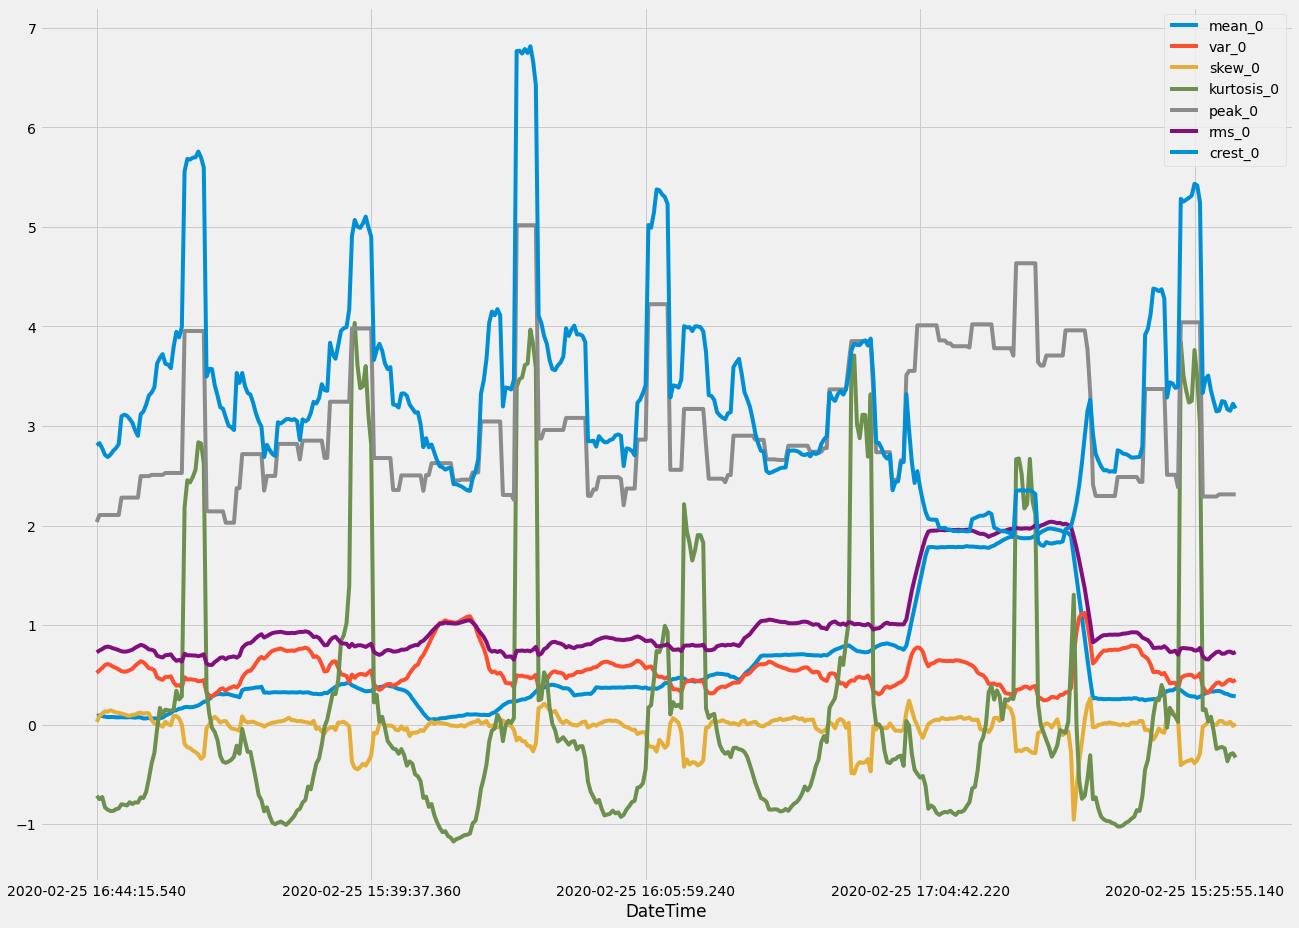

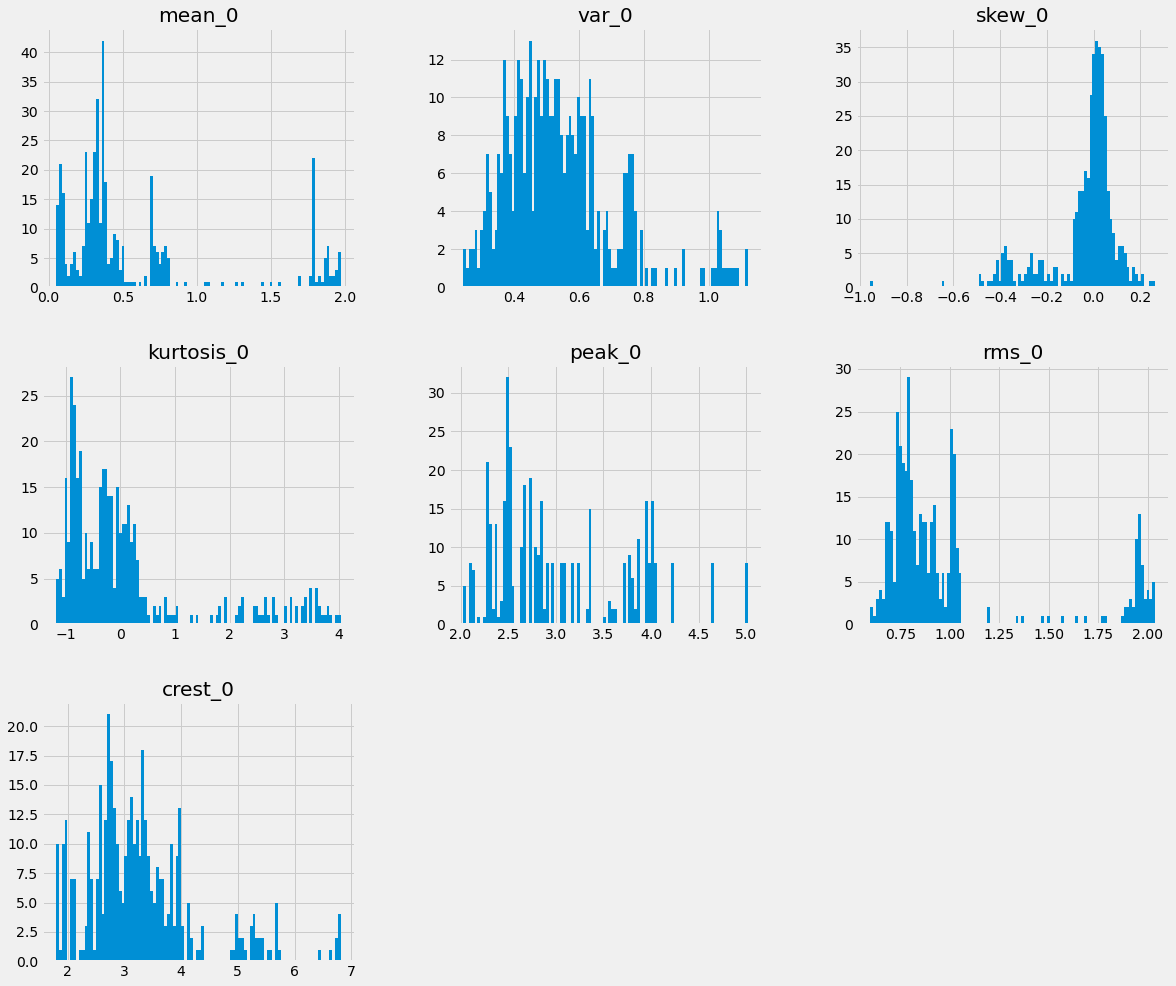

In [119]:
plt.style.use('fivethirtyeight')
data_vib_FR_LH = data_vib2.iloc[:,5:12]
data_vib_FR_LH = data_vib_FR_LH.dropna()
print(len(data_vib_FR_LH))
print(data_vib_FR_LH.head())
data_vib_FR_LH.plot(figsize=(20,15))
data_vib_FR_LH.hist(bins=100, figsize=(18,16))
plt.show()

416
                           mean_1     var_1    skew_1  kurtosis_1    peak_1  \
DateTime                                                                      
2020-02-25 16:44:15.540  0.052806  0.491262 -0.257778    1.014545  2.845837   
2020-02-25 16:44:16.790  0.058583  0.468080 -0.221783    1.225859  2.845837   
2020-02-25 16:44:18.040  0.061446  0.400131 -0.180909    1.634463  2.845837   
2020-02-25 16:44:19.290  0.064414  0.273787 -0.067446   -0.381520  1.647685   
2020-02-25 16:44:20.540  0.060661  0.266616 -0.072705   -0.391084  1.647685   

                            rms_1   crest_1  
DateTime                                     
2020-02-25 16:44:15.540  0.702713  4.049788  
2020-02-25 16:44:16.790  0.686497  4.145447  
2020-02-25 16:44:18.040  0.635379  4.478960  
2020-02-25 16:44:19.290  0.527067  3.126142  
2020-02-25 16:44:20.540  0.519771  3.170020  


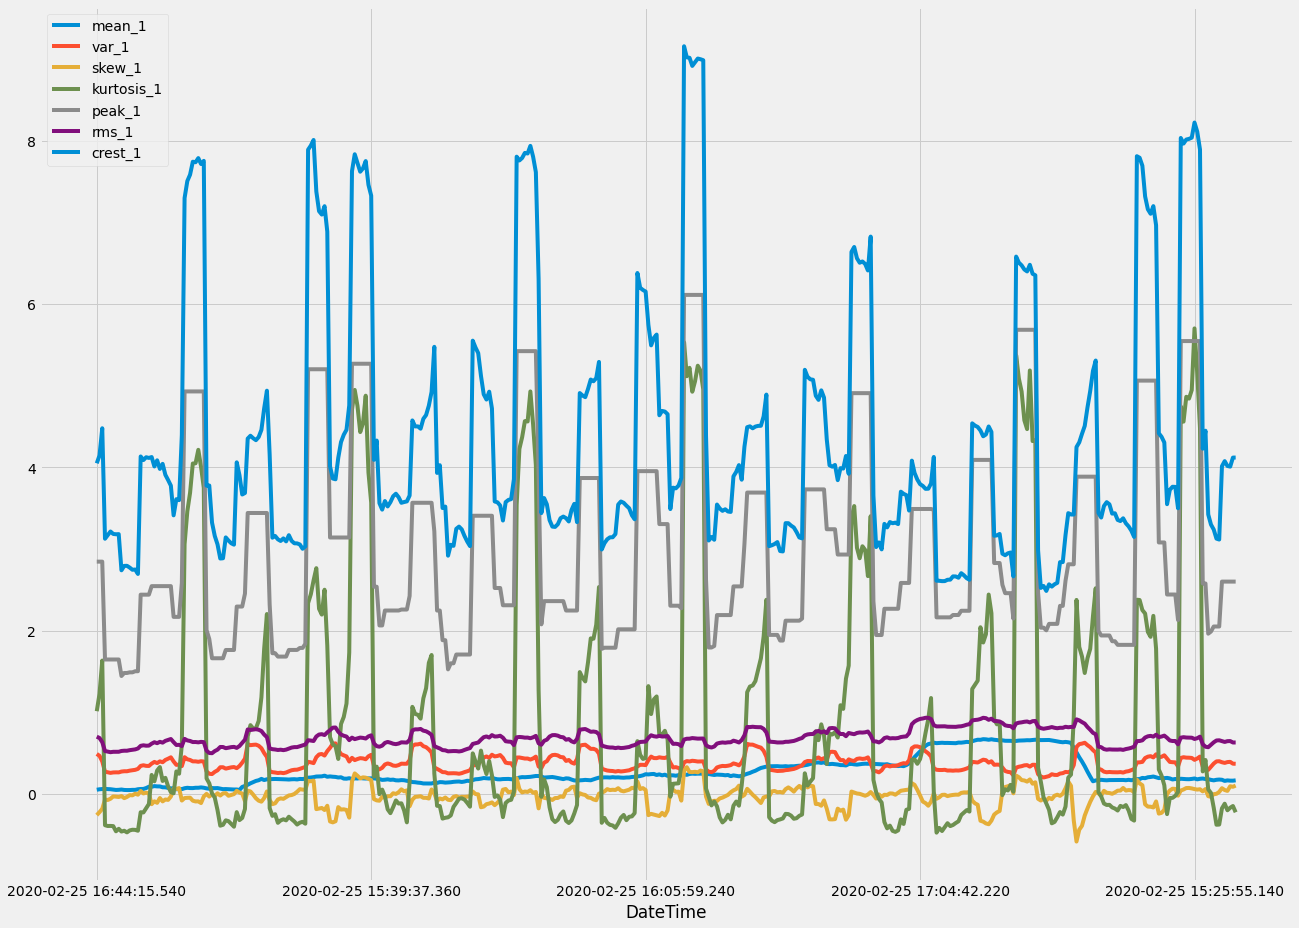

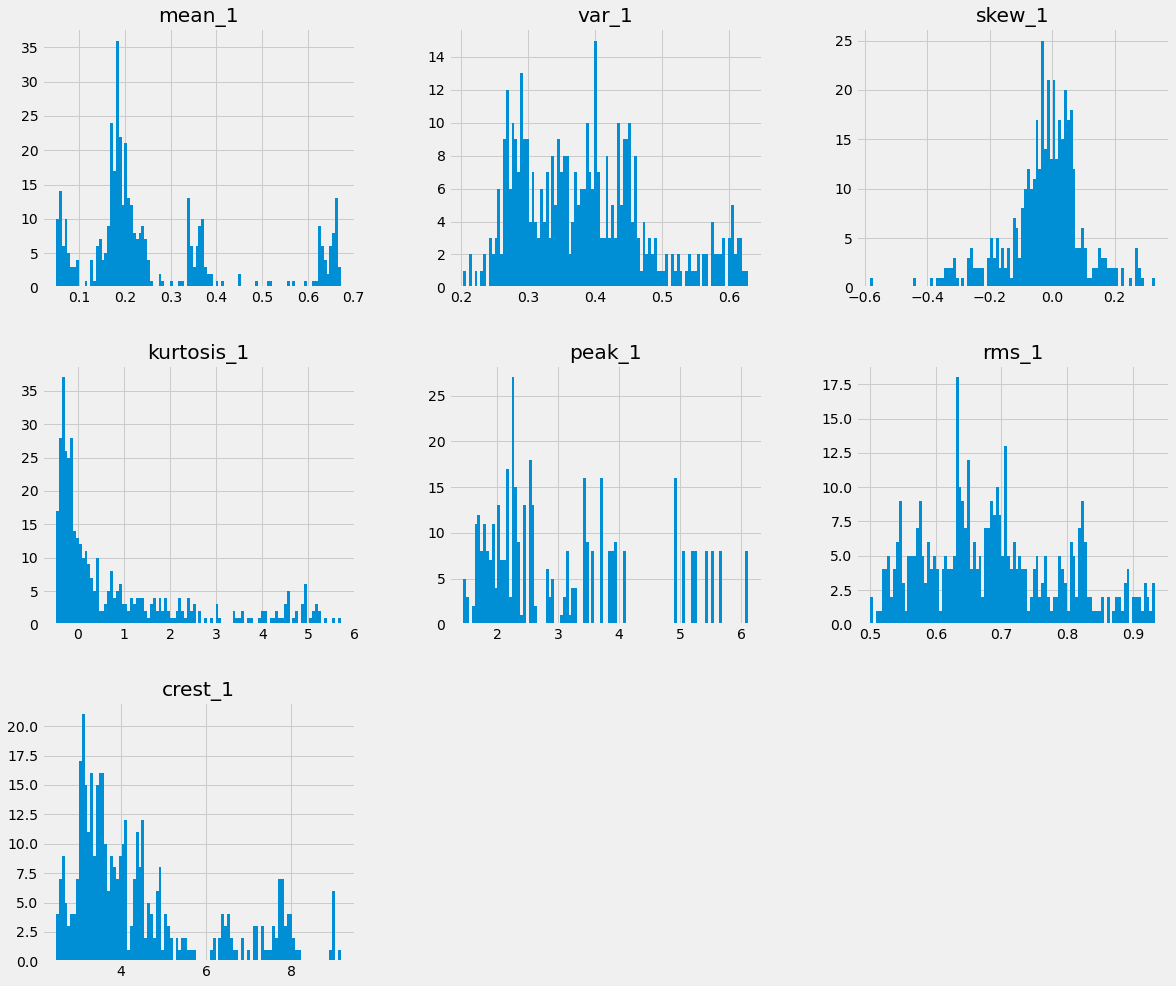

In [120]:
plt.style.use('fivethirtyeight')
data_vib_FR_RH = data_vib2.iloc[:,12:19]
data_vib_FR_RH = data_vib_FR_RH.dropna()
print(len(data_vib_FR_RH))
print(data_vib_FR_RH.head())
data_vib_FR_RH.plot(figsize=(20,15))
data_vib_FR_RH.hist(bins=100, figsize=(18,16))
plt.show()

416
                           mean_2     var_2    skew_2  kurtosis_2    peak_2  \
DateTime                                                                      
2020-02-25 16:44:15.540  0.383166  0.289020 -0.208431    1.690327  2.433434   
2020-02-25 16:44:16.790  0.394658  0.212438 -0.006434    1.456948  2.433434   
2020-02-25 16:44:18.040  0.405869  0.164717  0.020118    1.134323  2.433434   
2020-02-25 16:44:19.290  0.406523  0.123182 -0.001879   -0.065433  1.538877   
2020-02-25 16:44:20.540  0.405876  0.125545 -0.017297   -0.120011  1.538877   

                            rms_2   crest_2  
DateTime                                     
2020-02-25 16:44:15.540  0.660070  3.686631  
2020-02-25 16:44:16.790  0.606702  4.010924  
2020-02-25 16:44:18.040  0.573902  4.240155  
2020-02-25 16:44:19.290  0.537011  2.865633  
2020-02-25 16:44:20.540  0.538718  2.856552  


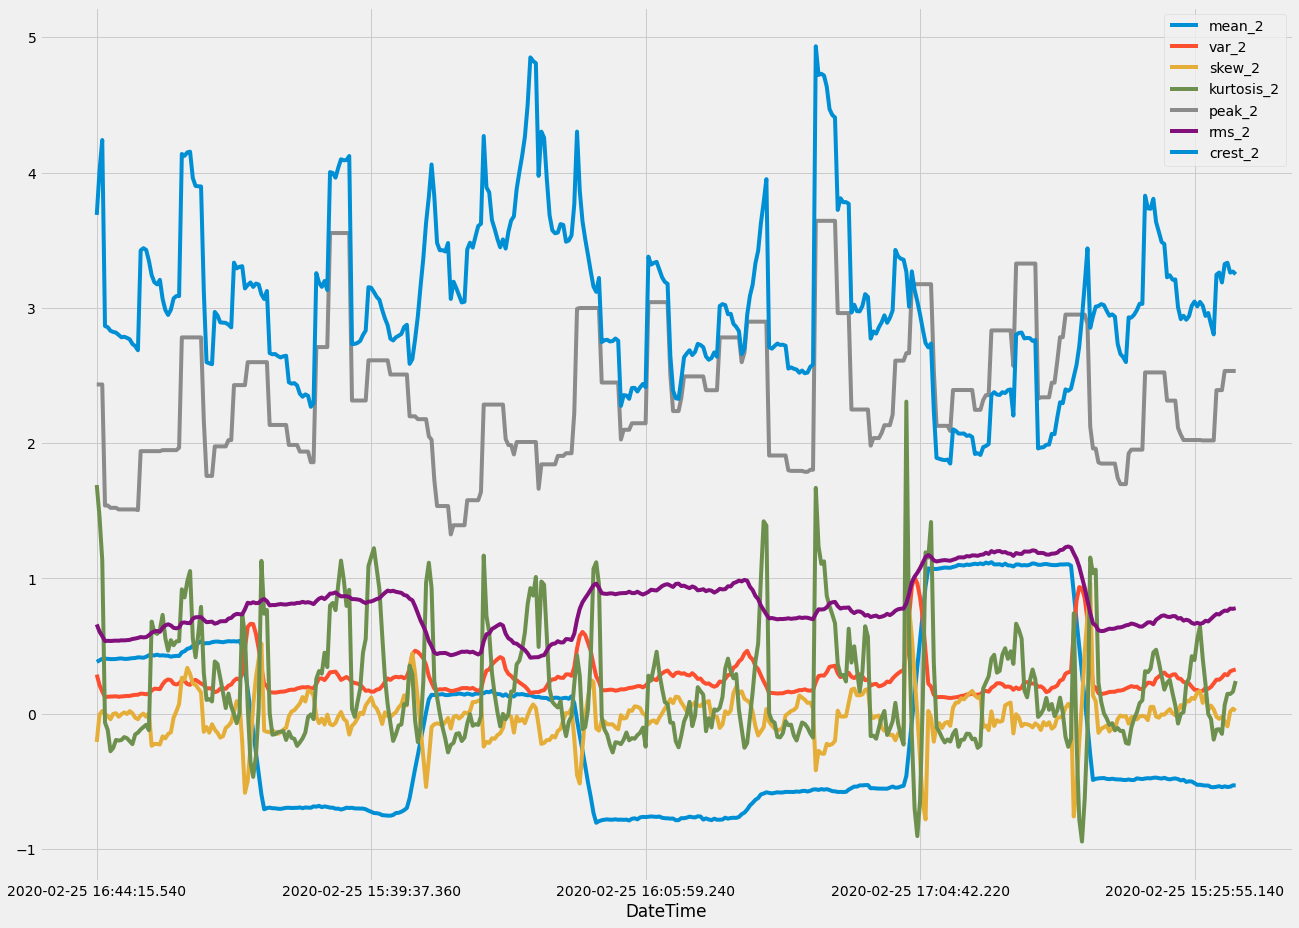

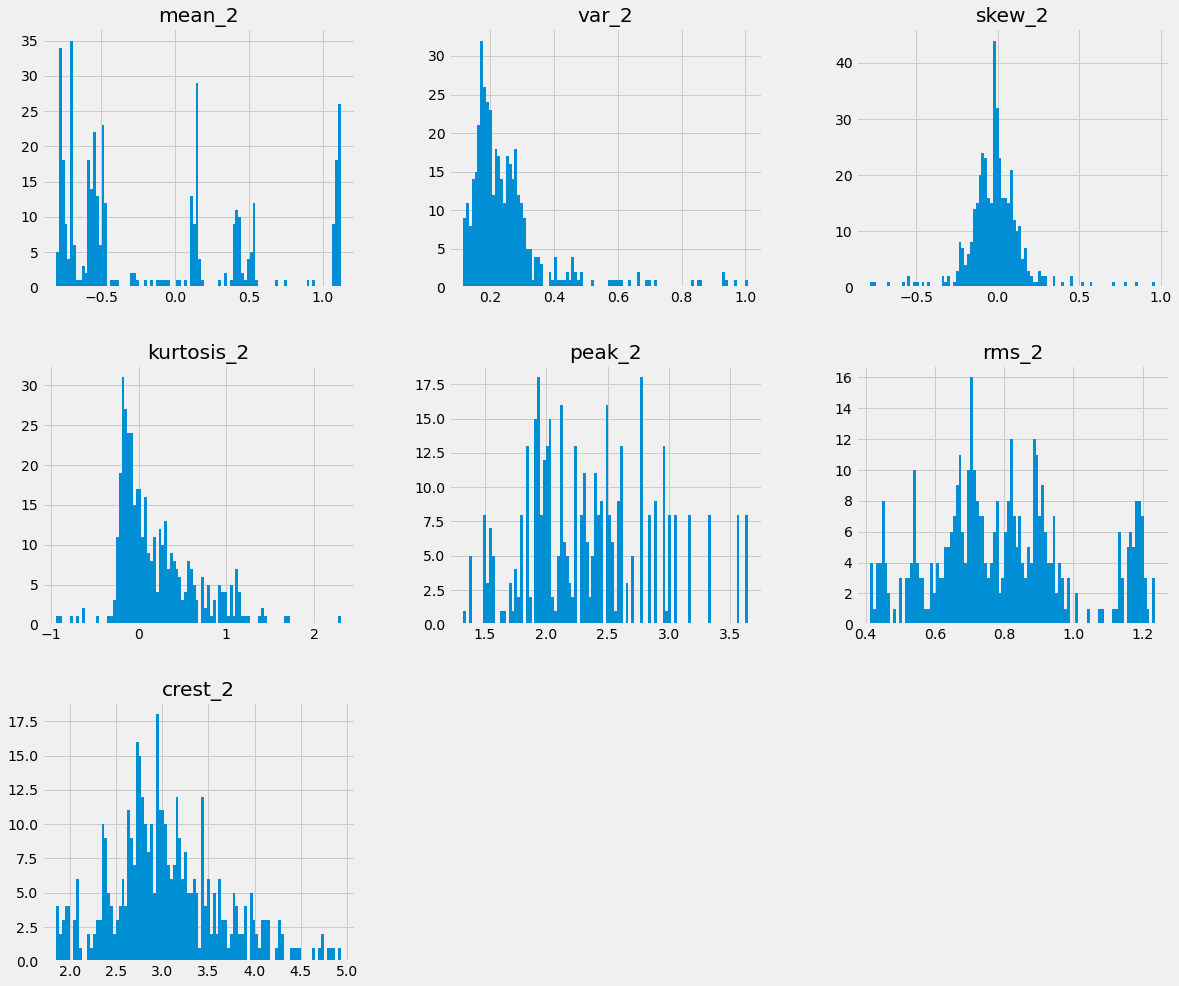

In [121]:
plt.style.use('fivethirtyeight')
data_vib_RR_LH = data_vib2.iloc[:,19:26]
data_vib_RR_LH = data_vib_RR_LH.dropna()
print(len(data_vib_RR_LH))
print(data_vib_RR_LH.head())
data_vib_RR_LH.plot(figsize=(20,15))
data_vib_RR_LH.hist(bins=100, figsize=(18,16))
plt.show()

416
                           mean_3     var_3    skew_3  kurtosis_3    peak_3  \
DateTime                                                                      
2020-02-25 16:44:15.540 -0.547904  0.232341 -0.262352    1.842264  2.747960   
2020-02-25 16:44:16.790 -0.535317  0.162925  0.006142    0.905770  2.222280   
2020-02-25 16:44:18.040 -0.525240  0.140541 -0.059248    0.387745  1.838765   
2020-02-25 16:44:19.290 -0.530516  0.113214 -0.090323   -0.036144  1.735353   
2020-02-25 16:44:20.540 -0.540417  0.115991 -0.123287   -0.075901  1.735353   

                            rms_3   crest_3  
DateTime                                     
2020-02-25 16:44:15.540  0.729674  3.766013  
2020-02-25 16:44:16.790  0.670379  3.314961  
2020-02-25 16:44:18.040  0.645250  2.849694  
2020-02-25 16:44:19.290  0.628175  2.762529  
2020-02-25 16:44:20.540  0.638736  2.716855  


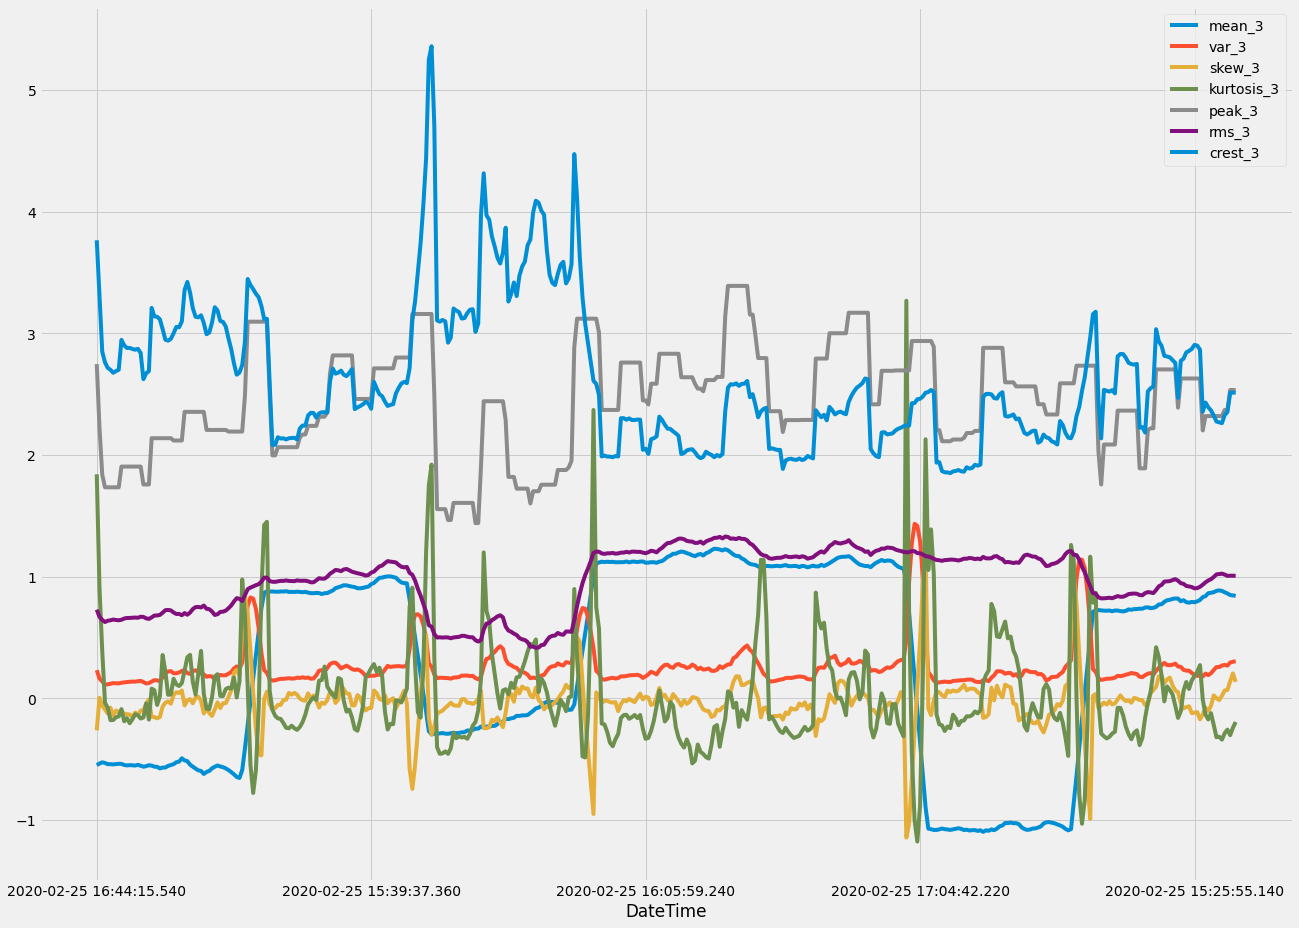

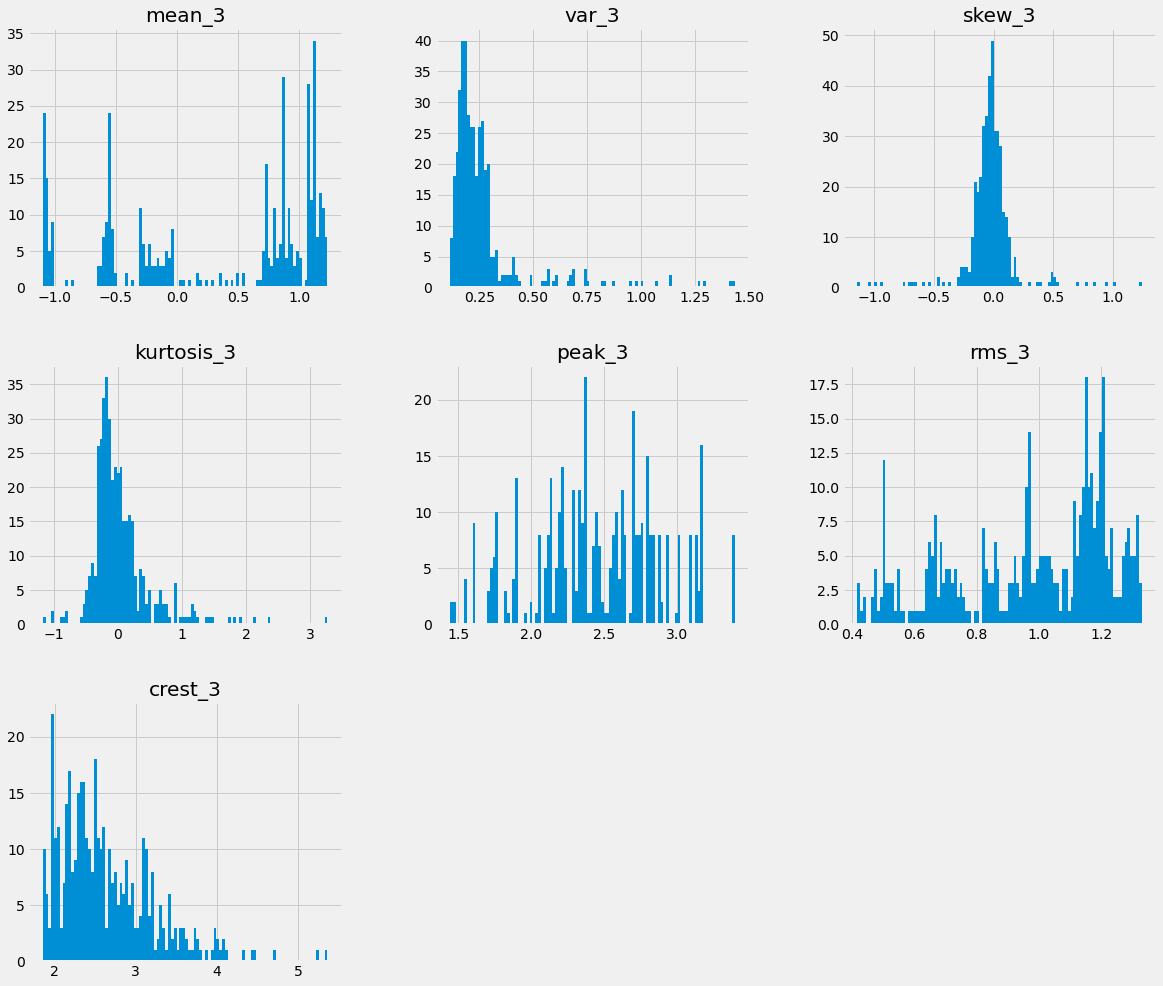

In [122]:
plt.style.use('fivethirtyeight')
data_vib_RR_RH = data_vib2.iloc[:,26:33]
data_vib_RR_RH = data_vib_RR_RH.dropna()
print(len(data_vib_RR_RH))
print(data_vib_RR_RH.head())
data_vib_RR_RH.plot(figsize=(20,15))
data_vib_RR_RH.hist(bins=100, figsize=(18,16))
plt.show()

416
                           mean_4     var_4    skew_4  kurtosis_4    peak_4  \
DateTime                                                                      
2020-02-25 16:44:15.540 -0.067681  0.334906 -0.065048    0.214574  2.097860   
2020-02-25 16:44:16.790 -0.062805  0.320670 -0.076331    0.299691  2.097860   
2020-02-25 16:44:18.040 -0.062942  0.248047 -0.051382    0.173272  1.960294   
2020-02-25 16:44:19.290 -0.061912  0.198001  0.004027   -0.336908  1.330635   
2020-02-25 16:44:20.540 -0.064391  0.199719 -0.001291   -0.347107  1.330635   

                            rms_4   crest_4  
DateTime                                     
2020-02-25 16:44:15.540  0.582511  3.601408  
2020-02-25 16:44:16.790  0.569609  3.682981  
2020-02-25 16:44:18.040  0.501881  3.905890  
2020-02-25 16:44:19.290  0.449149  2.962566  
2020-02-25 16:44:20.540  0.451404  2.947769  


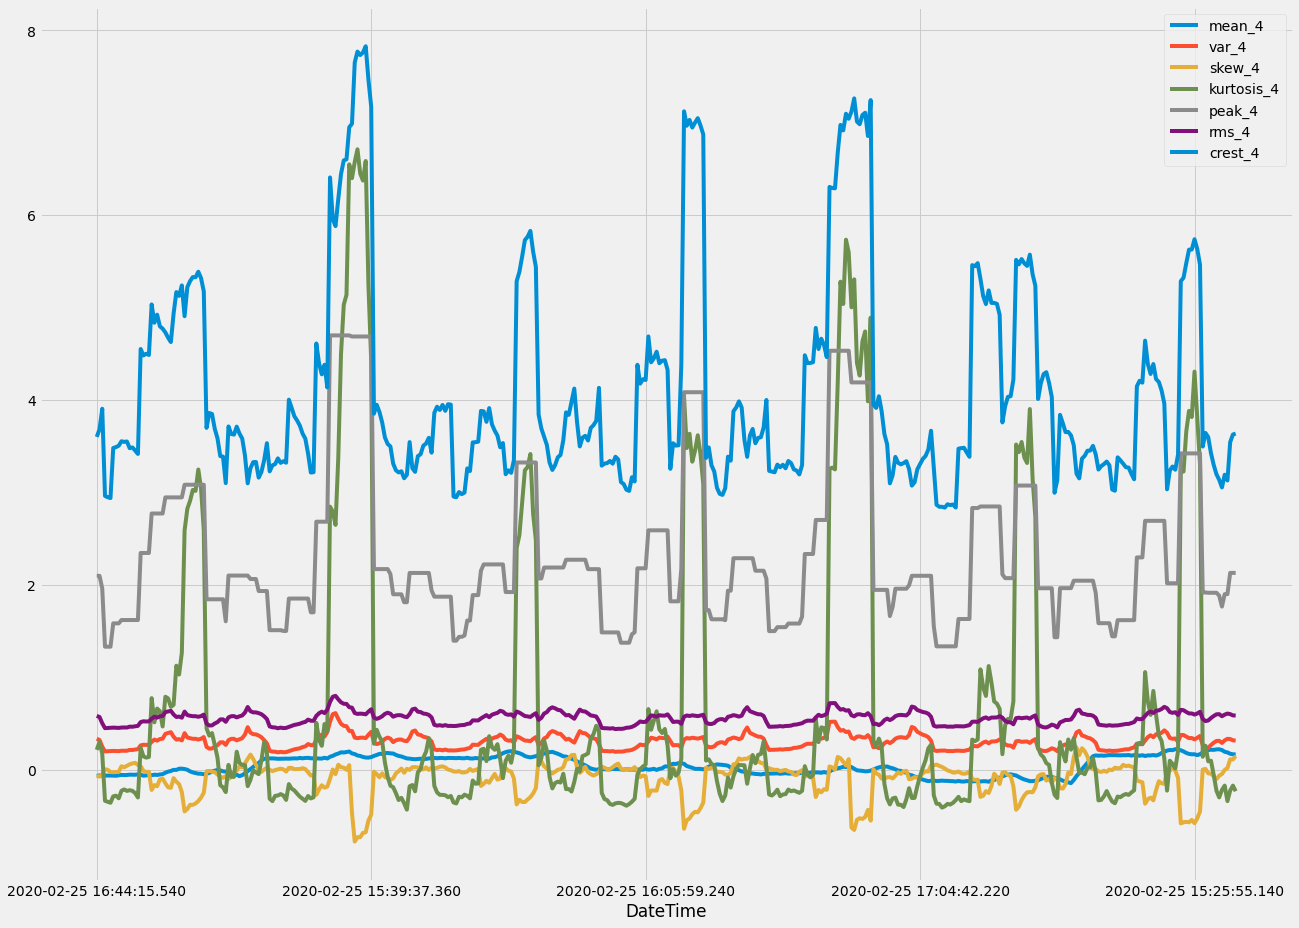

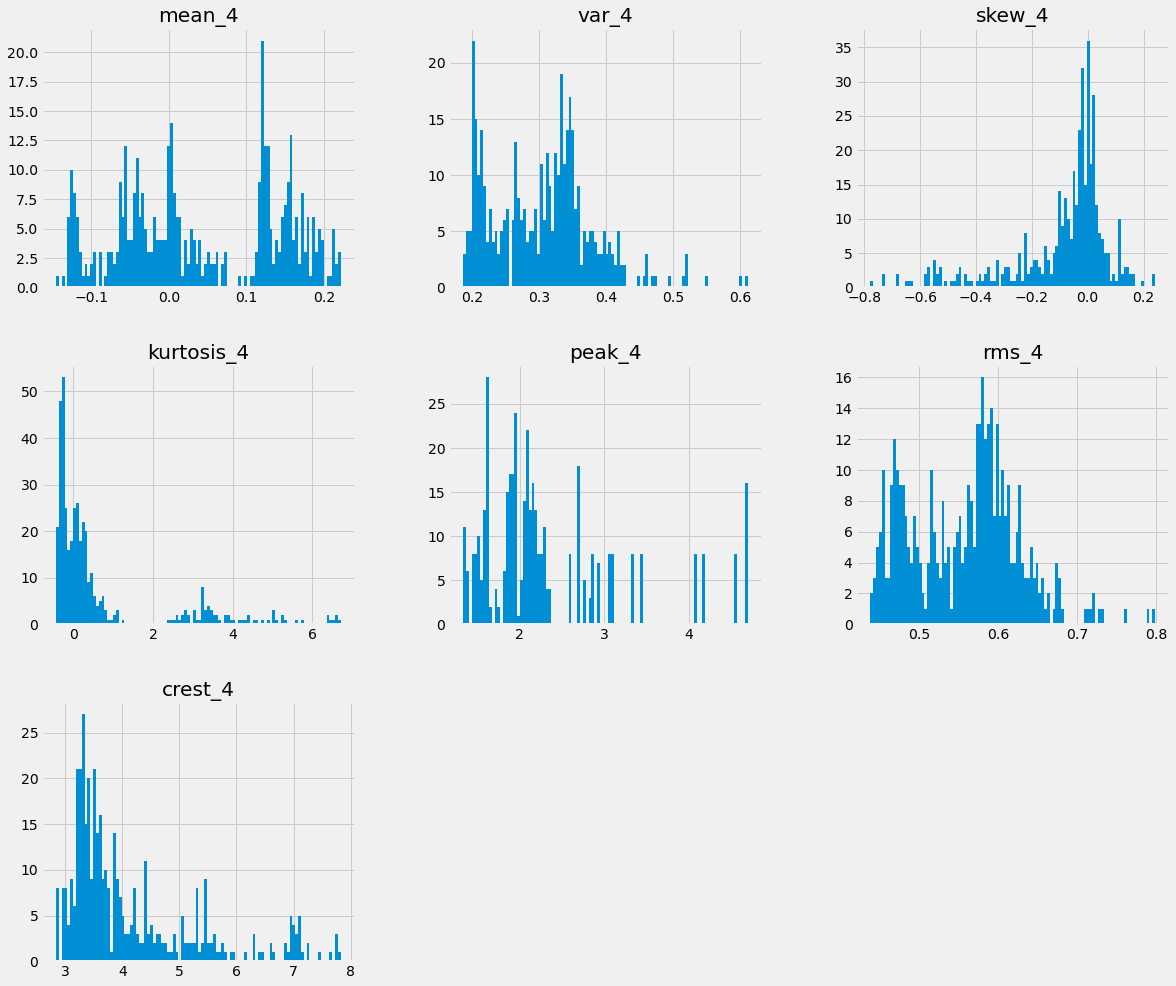

In [123]:
plt.style.use('fivethirtyeight')
data_vib_Cabin = data_vib2.iloc[:,33:40]
data_vib_Cabin = data_vib_Cabin.dropna()
print(len(data_vib_Cabin))
print(data_vib_Cabin.head())
data_vib_Cabin.plot(figsize=(20,15))
data_vib_Cabin.hist(bins=100, figsize=(18,16))
plt.show()

# Import and read test (subset of Feb - normal vehicle) set

In [124]:
data = pd.read_csv("Input_Data_Files/SmoothDataTest_Feb.csv", index_col=0)
data

FR_LH [m/s2]  FR_RH [m/s2]  RR_LH [m/s2]  \
DateTime                                                            
2020-02-25 15:03:04.425     -0.757349     -0.709606     -0.639939   
2020-02-25 15:03:04.430      0.619478      0.428583     -0.492601   
2020-02-25 15:03:04.435      1.745396      1.014770     -0.729361   
2020-02-25 15:03:04.440      0.062191     -0.080798     -0.539860   
2020-02-25 15:03:04.445     -0.224184     -0.766837     -0.430473   
...                               ...           ...           ...   
2020-02-25 17:07:15.915      2.039397      1.363934      1.001291   
2020-02-25 17:07:15.920      2.298627     -0.070626      0.328625   
2020-02-25 17:07:15.925      1.452066      0.761699      1.373090   
2020-02-25 17:07:15.930      2.108376      0.412482      0.551275   
2020-02-25 17:07:15.935      2.520184      1.588658      1.049435   

                         RR_RH [m/s2]  Cabin [m/s2]  
DateTime                                             
2020-02-25 15:03:04.425     -0.808832     -0.829674  
2020-02-25 15:03:04.430     -0.478179      0.005857  
2020-02-25 15:03:04.435     -1.484268      0.453091  
2020-02-25 15:03:04.440     -0.560732     -0.123652  
2020-02-25 15:03:04.445     -0.779751     -0.589203  
...                               ...           ...  
2020-02-25 17:07:15.915     -1.255134     -0.415626  
2020-02-25 17:07:15.920     -1.718490     -0.268216  
2020-02-25 17:07:15.925     -1.387942      0.476310  
2020-02-25 17:07:15.930     -1.481786      0.219412  
2020-02-25 17:07:15.935     -1.307177      0.037008  

[120509 rows x 5 columns]

In [52]:
data.describe()

FR_LH [m/s2]   FR_RH [m/s2]   RR_LH [m/s2]   RR_RH [m/s2]  \
count  120509.000000  120509.000000  120509.000000  120509.000000   
mean        0.771191       0.315376      -0.024311       0.166633   
std         0.893403       0.641234       0.818216       0.914273   
min        -4.750211      -5.877948      -3.737362      -3.157780   
25%         0.149365      -0.095630      -0.629282      -0.531000   
50%         0.752769       0.318590      -0.081082       0.220407   
75%         1.369915       0.734368       0.561931       0.862535   
max         6.619570       7.047453       3.368091       3.819611   

        Cabin [m/s2]  
count  120509.000000  
mean        0.043620  
std         0.565499  
min        -4.456687  
25%        -0.328484  
50%         0.043052  
75%         0.414027  
max         3.163019

array([<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>], dtype=object)

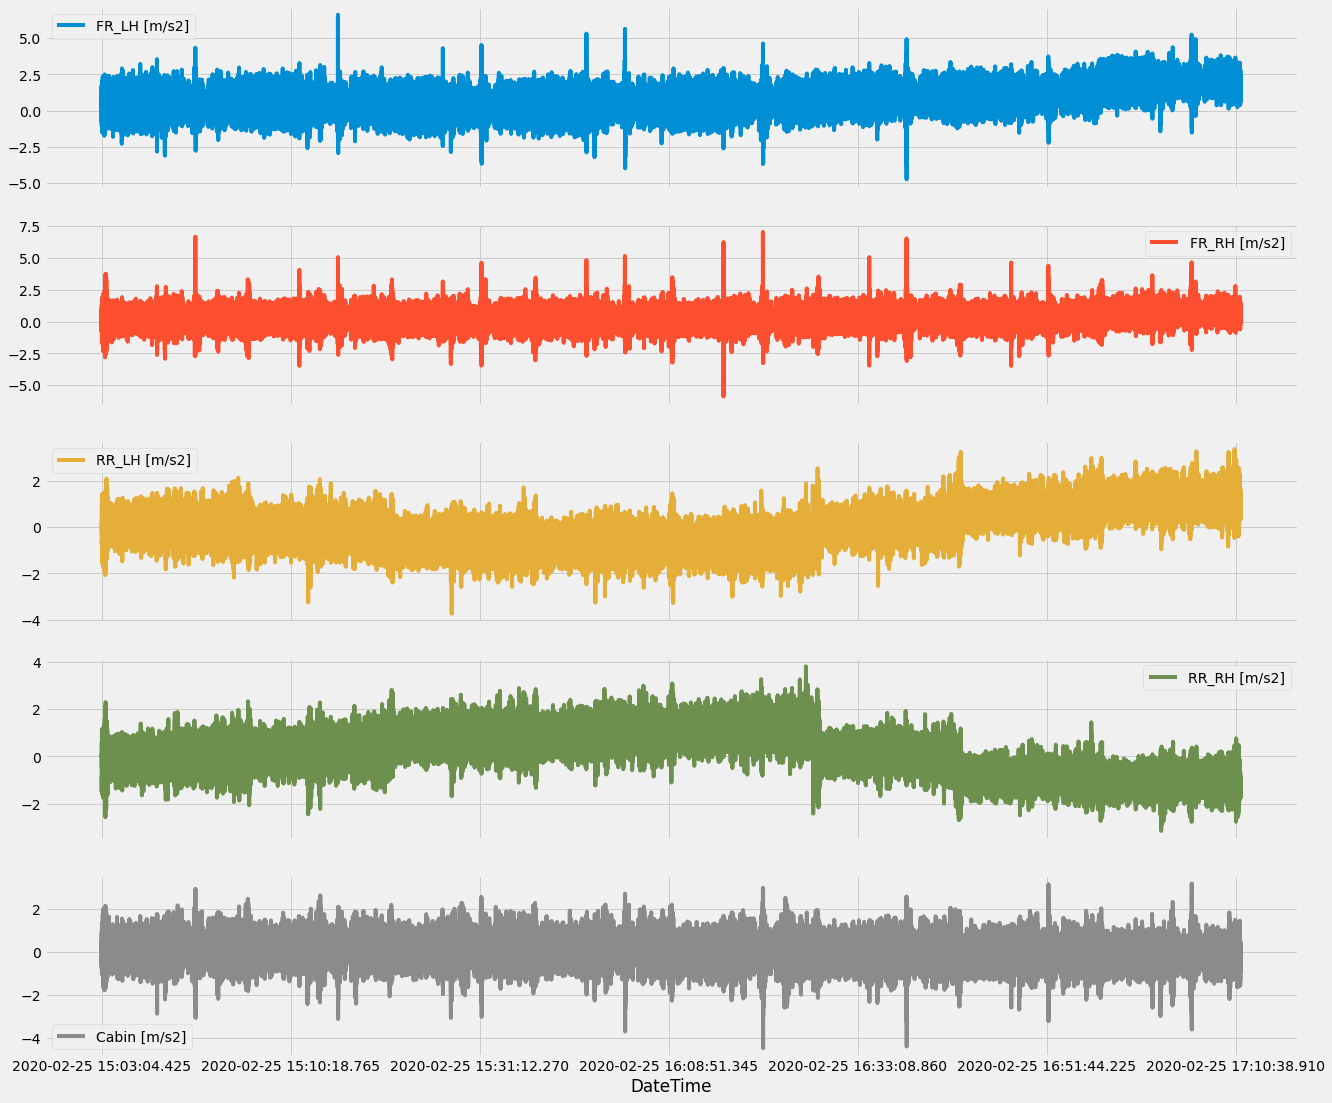

In [125]:
plt.style.use('fivethirtyeight')
data.plot(figsize=(20,18), subplots=True)

In [54]:
data_test_new = data.reset_index()
data_test1 = data_test_new.iloc[:,1:6]
data_test1

FR_LH [m/s2]  FR_RH [m/s2]  RR_LH [m/s2]  RR_RH [m/s2]  Cabin [m/s2]
0          -0.757349     -0.709606     -0.639939     -0.808832     -0.829674
1           0.619478      0.428583     -0.492601     -0.478179      0.005857
2           1.745396      1.014770     -0.729361     -1.484268      0.453091
3           0.062191     -0.080798     -0.539860     -0.560732     -0.123652
4          -0.224184     -0.766837     -0.430473     -0.779751     -0.589203
...              ...           ...           ...           ...           ...
120504      2.039397      1.363934      1.001291     -1.255134     -0.415626
120505      2.298627     -0.070626      0.328625     -1.718490     -0.268216
120506      1.452066      0.761699      1.373090     -1.387942      0.476310
120507      2.108376      0.412482      0.551275     -1.481786      0.219412
120508      2.520184      1.588658      1.049435     -1.307177      0.037008

[120509 rows x 5 columns]

# Feature extraction (7 features for each sensor) of test set (total 35 features)

In [55]:
data_test1_new = time_domain_features(data_test1,2000,250)
data_test1_new

FR_LH [m/s2]  FR_RH [m/s2]  RR_LH [m/s2]  RR_RH [m/s2]  Cabin [m/s2]  \
0          -0.757349     -0.709606     -0.639939     -0.808832     -0.829674   
1           0.619478      0.428583     -0.492601     -0.478179      0.005857   
2           1.745396      1.014770     -0.729361     -1.484268      0.453091   
3           0.062191     -0.080798     -0.539860     -0.560732     -0.123652   
4          -0.224184     -0.766837     -0.430473     -0.779751     -0.589203   
...              ...           ...           ...           ...           ...   
120504      2.039397      1.363934      1.001291     -1.255134     -0.415626   
120505      2.298627     -0.070626      0.328625     -1.718490     -0.268216   
120506      1.452066      0.761699      1.373090     -1.387942      0.476310   
120507      2.108376      0.412482      0.551275     -1.481786      0.219412   
120508      2.520184      1.588658      1.049435     -1.307177      0.037008   

        mean_0  var_0  skew_0  kurtosis_0  peak_0  ...  peak_3  rms_3  \
0          NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
1          NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
2          NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
3          NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
4          NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
...        ...    ...     ...         ...     ...  ...     ...    ...   
120504     NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
120505     NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
120506     NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
120507     NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   
120508     NaN    NaN     NaN         NaN     NaN  ...     NaN    NaN   

        crest_3  mean_4  var_4  skew_4  kurtosis_4  peak_4  rms_4  crest_4  
0           NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
1           NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
2           NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
3           NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
4           NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
...         ...     ...    ...     ...         ...     ...    ...      ...  
120504      NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
120505      NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
120506      NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
120507      NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  
120508      NaN     NaN    NaN     NaN         NaN     NaN    NaN      NaN  

[120509 rows x 40 columns]

# Considering extracted features for each sensor value of test 1 set (7 features at a time)

475
                     DateTime    mean_0     var_0    skew_0  kurtosis_0  \
1999  2020-02-25 15:03:14.420  0.415049  0.744222  0.012057   -0.903296   
2249  2020-02-25 15:03:15.670  0.422408  0.795375  0.024751   -0.839360   
2499  2020-02-25 15:03:16.920  0.417131  0.832640  0.046811   -0.931070   
2749  2020-02-25 15:03:18.170  0.415968  0.883422  0.035275   -1.017688   
2999  2020-02-25 15:03:19.420  0.417246  0.924354  0.033369   -1.040270   

        peak_0     rms_0   crest_0  
1999  2.498417  0.957140  2.610296  
2249  2.911276  0.986613  2.950778  
2499  2.911276  1.003106  2.902261  
2749  2.911276  1.027623  2.833019  
2999  2.911276  1.047848  2.778338  


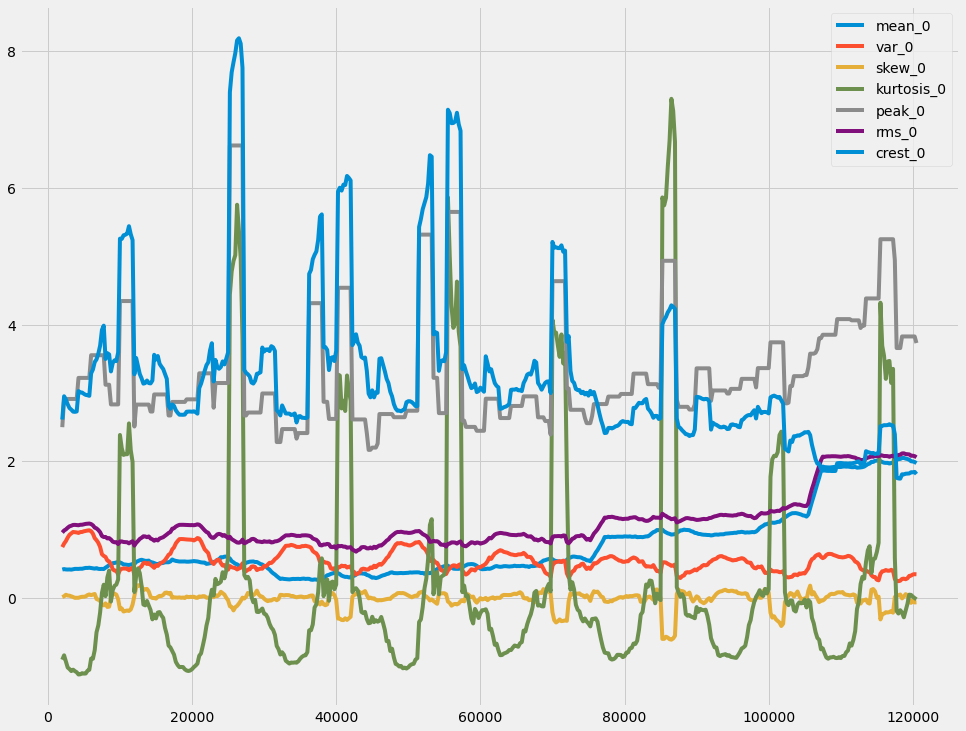

In [126]:
plt.style.use('fivethirtyeight')
data_new_FR_LH = data_test1_new.iloc[:,5:12]
data_new_FR_LH = pd.concat([data_test_new.loc[:,'DateTime'], data_new_FR_LH], axis=1 )
data_new_FR_LH
data_new_FR_LH = data_new_FR_LH.dropna()
print(len(data_new_FR_LH))
print(data_new_FR_LH.head())
data_new_FR_LH.plot(figsize=(15,12))
plt.show()

475
                     DateTime    mean_1     var_1    skew_1  kurtosis_1  \
1999  2020-02-25 15:03:14.420  0.195917  0.583398 -0.053394    1.600911   
2249  2020-02-25 15:03:15.670  0.208570  0.528346  0.016826    2.016488   
2499  2020-02-25 15:03:16.920  0.209819  0.329558 -0.093911    0.053655   
2749  2020-02-25 15:03:18.170  0.217279  0.299402 -0.088549   -0.140023   
2999  2020-02-25 15:03:19.420  0.213237  0.283013 -0.066239   -0.090297   

        peak_1     rms_1   crest_1  
1999  3.757506  0.788346  4.766316  
2249  3.757506  0.756032  4.970038  
2499  2.334477  0.611079  3.820256  
2749  1.925133  0.588611  3.270639  
2999  1.925133  0.573011  3.359677  


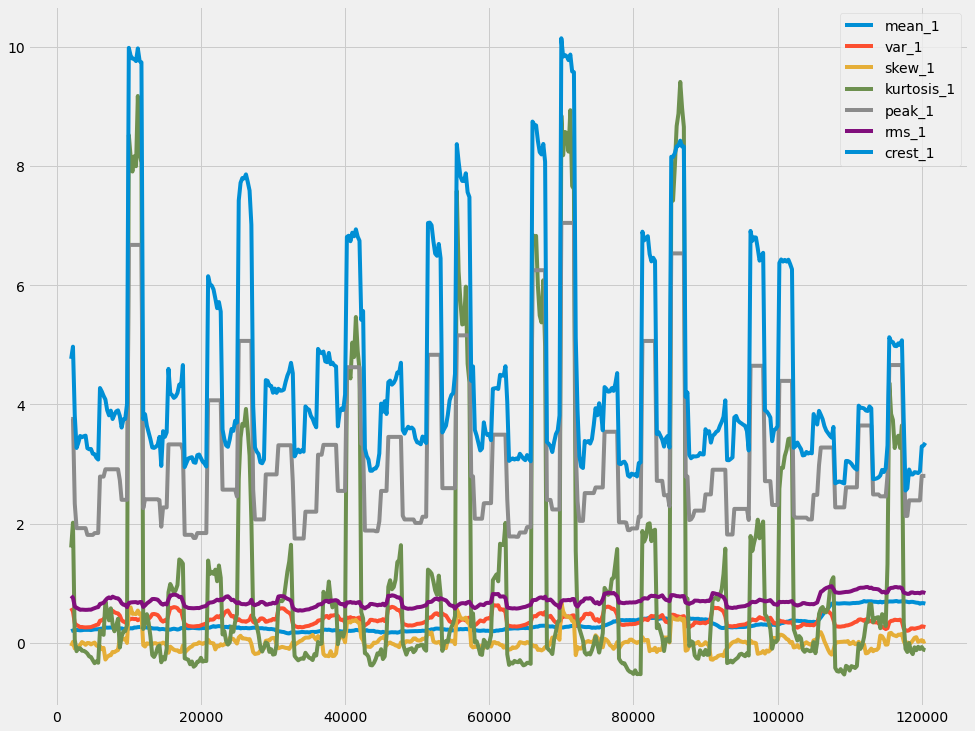

In [127]:
plt.style.use('fivethirtyeight')
data_new_FR_RH = data_test1_new.iloc[:,12:19]
data_new_FR_RH = pd.concat([data_test_new.loc[:,'DateTime'], data_new_FR_RH], axis=1 )
data_new_FR_RH = data_new_FR_RH.dropna()
print(len(data_new_FR_RH))
print(data_new_FR_RH.head())
data_new_FR_RH.plot(figsize=(15,12))
plt.show()

475
                     DateTime    mean_2     var_2    skew_2  kurtosis_2  \
1999  2020-02-25 15:03:14.420  0.080175  0.233741 -0.147300    0.786352   
2249  2020-02-25 15:03:15.670  0.082448  0.213626 -0.154122    0.893973   
2499  2020-02-25 15:03:16.920  0.088071  0.178289  0.020625    0.212403   
2749  2020-02-25 15:03:18.170  0.080870  0.165690 -0.048989   -0.221317   
2999  2020-02-25 15:03:19.420  0.077413  0.166433 -0.051912   -0.248107   

        peak_2     rms_2   crest_2  
1999  2.090783  0.489951  4.267328  
2249  2.090783  0.469380  4.454353  
2499  2.090783  0.431227  4.848457  
2749  1.474095  0.414906  3.552844  
2999  1.474095  0.415141  3.550826  


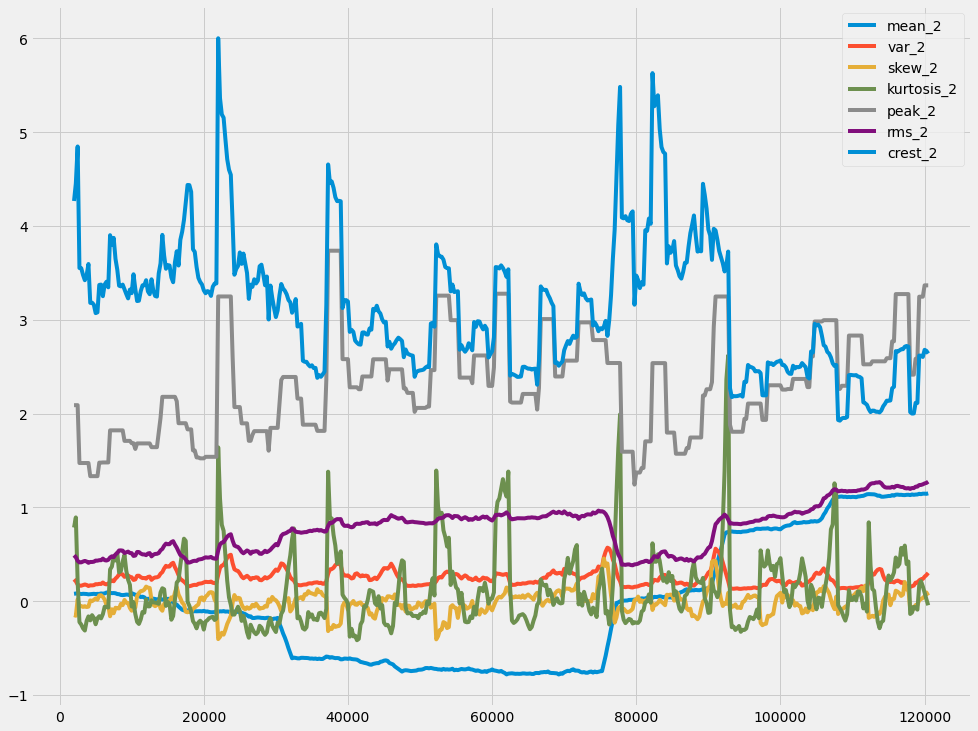

In [128]:
plt.style.use('fivethirtyeight')
data_new_RR_LH = data_test1_new.iloc[:,19:26]
data_new_RR_LH = pd.concat([data_test_new.loc[:,'DateTime'], data_new_RR_LH], axis=1 )
data_new_RR_LH = data_new_RR_LH.dropna()
print(len(data_new_RR_LH))
print(data_new_RR_LH.head())
data_new_RR_LH.plot(figsize=(15,12))
plt.show()

475
                     DateTime    mean_3     var_3    skew_3  kurtosis_3  \
1999  2020-02-25 15:03:14.420 -0.111018  0.281856 -0.052422    1.193964   
2249  2020-02-25 15:03:15.670 -0.097837  0.258274 -0.087954    1.442259   
2499  2020-02-25 15:03:16.920 -0.092990  0.187592 -0.077916    0.000074   
2749  2020-02-25 15:03:18.170 -0.094918  0.163413 -0.064238   -0.233012   
2999  2020-02-25 15:03:19.420 -0.098203  0.166800 -0.059402   -0.284861   

        peak_3     rms_3   crest_3  
1999  2.576294  0.542255  4.751075  
2249  2.576294  0.517414  4.979176  
2499  1.649604  0.442883  3.724692  
2749  1.448669  0.415140  3.489595  
2999  1.448669  0.419953  3.449598  


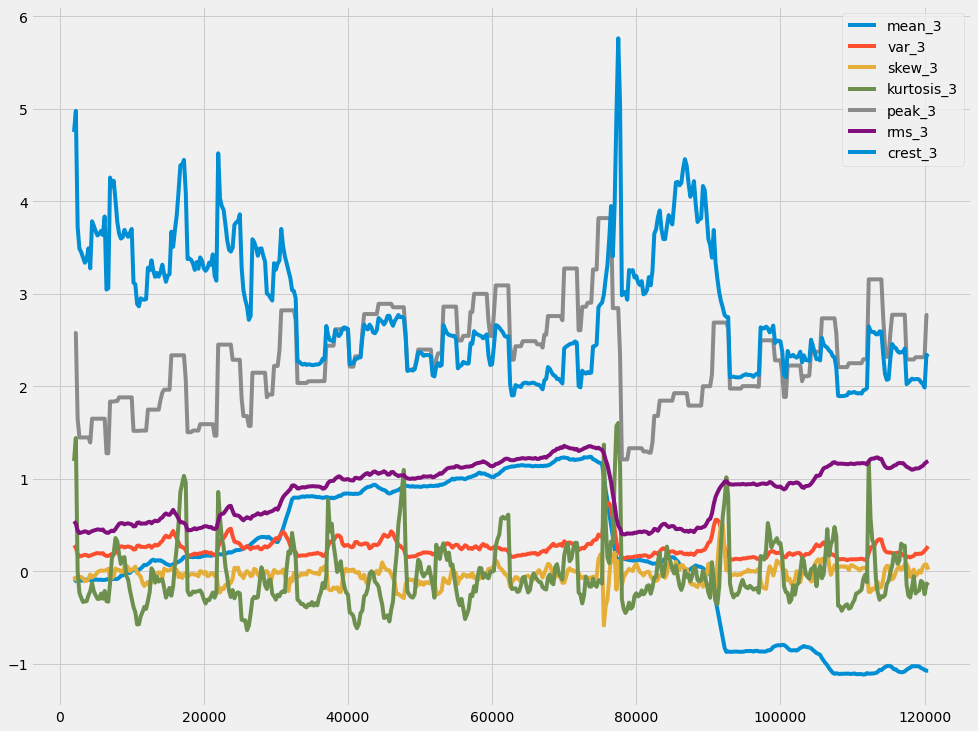

In [129]:
plt.style.use('fivethirtyeight')
data_new_RR_RH = data_test1_new.iloc[:,26:33]
data_new_RR_RH = pd.concat([data_test_new.loc[:,'DateTime'], data_new_RR_RH], axis=1 )
data_new_RR_RH = data_new_RR_RH.dropna()
print(len(data_new_RR_RH))
print(data_new_RR_RH.head())
data_new_RR_RH.plot(figsize=(15,12))
plt.show()

475
                     DateTime    mean_4     var_4    skew_4  kurtosis_4  \
1999  2020-02-25 15:03:14.420  0.114758  0.338501  0.022235    0.439495   
2249  2020-02-25 15:03:15.670  0.125110  0.299395  0.061229    0.398529   
2499  2020-02-25 15:03:16.920  0.123023  0.211877  0.021612   -0.061482   
2749  2020-02-25 15:03:18.170  0.123588  0.203548 -0.003866   -0.088857   
2999  2020-02-25 15:03:19.420  0.120935  0.207442 -0.019285   -0.128493   

        peak_4     rms_4   crest_4  
1999  2.118088  0.592875  3.572571  
2249  2.118088  0.561157  3.774498  
2499  1.636088  0.476347  3.434658  
2749  1.636088  0.467675  3.498345  
2999  1.615029  0.471130  3.427991  


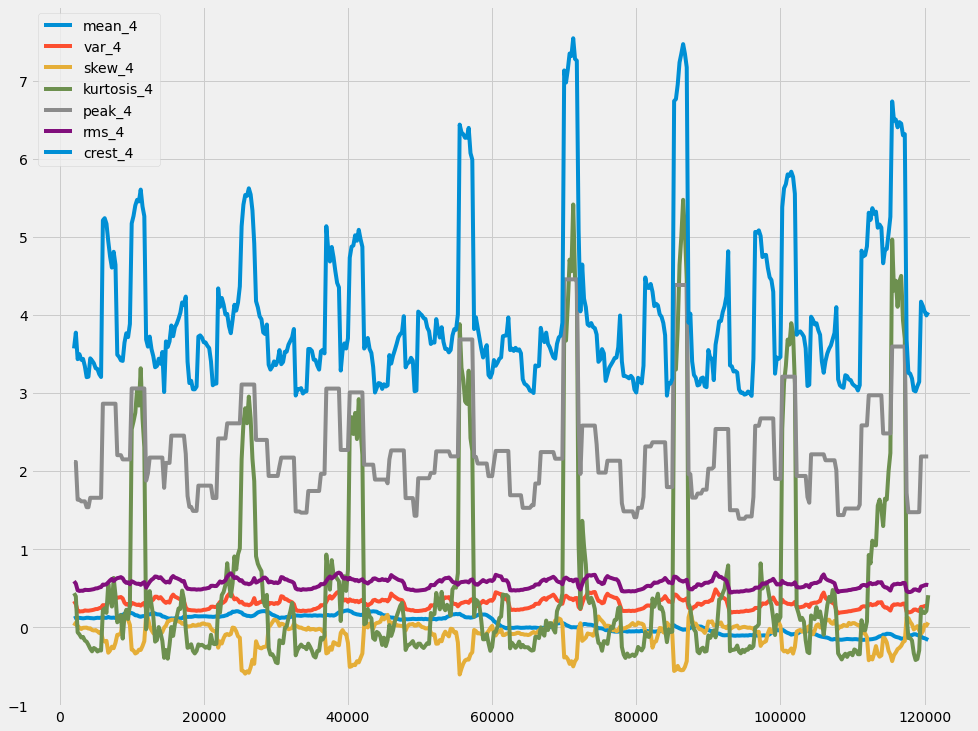

In [130]:
plt.style.use('fivethirtyeight')
data_new_Cabin = data_test1_new.iloc[:,33:40]
data_new_Cabin = pd.concat([data_test_new.loc[:,'DateTime'], data_new_Cabin], axis=1 )
data_new_Cabin = data_new_Cabin.dropna()
print(len(data_new_Cabin))
print(data_new_Cabin.head())
data_new_Cabin.plot(figsize=(15,12))
plt.show()

# Mahalanobis distance calculation function

In [64]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Mahalanobis distance calculation for test 1 set for FR_LH sensor comparing with mean and covariance values of train (reference) set

In [66]:
df_FR_LH = data_new_FR_LH[['mean_0', 'var_0', 'skew_0', 'kurtosis_0', 'peak_0', 'rms_0', 'crest_0']]
df_FR_LH['mahala'] = mahalanobis(x=df_FR_LH, data=data_vib_FR_LH[['mean_0', 'var_0', 'skew_0', 'kurtosis_0', 'peak_0', 'rms_0', 'crest_0']])
df_FR_LH = pd.concat([data_new_FR_LH['DateTime'], df_FR_LH], axis =1)
df_FR_LH_asc = df_FR_LH.sort_values(by=['mahala'], ascending=False)
df_FR_LH_asc

C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DateTime    mean_0     var_0    skew_0  kurtosis_0  \
86499  2020-02-25 16:35:06.905  0.926445  0.469749 -0.610316    7.302080   
86749  2020-02-25 16:35:08.155  0.930783  0.474937 -0.591923    7.125751   
51499  2020-02-25 15:44:33.385  0.373717  0.820175  0.076072   -0.351804   
51749  2020-02-25 15:44:34.635  0.364299  0.787084  0.083470   -0.313861   
86999  2020-02-25 16:35:09.405  0.933905  0.488375 -0.553201    6.671701   
...                        ...       ...       ...       ...         ...   
46749  2020-02-25 15:44:09.635  0.337386  0.544789 -0.022319   -0.467861   
47249  2020-02-25 15:44:12.135  0.355084  0.607138 -0.011654   -0.628361   
67749  2020-02-25 16:09:30.090  0.473126  0.509057 -0.038325    0.102685   
38999  2020-02-25 15:31:07.265  0.338698  0.502754  0.019494   -0.040884   
38749  2020-02-25 15:31:06.015  0.331561  0.515856 -0.094470    0.270397   

         peak_0     rms_0   crest_0     mahala  
86499  4.932815  1.152308  4.280811  95.246338  
86749  4.932815  1.158040  4.259624  91.861271  
51499  5.315733  0.979505  5.426960  84.034955  
51749  5.315733  0.958856  5.543831  82.979110  
86999  4.932815  1.166323  4.229372  82.601463  
...         ...       ...       ...        ...  
46749  2.690559  0.811385  3.316007   0.946911  
47249  2.690559  0.856107  3.142784   0.860672  
67749  2.949305  0.855950  3.445650   0.850602  
38999  2.619438  0.785633  3.334176   0.802176  
38749  2.869801  0.790905  3.628502   0.587181  

[475 rows x 9 columns]

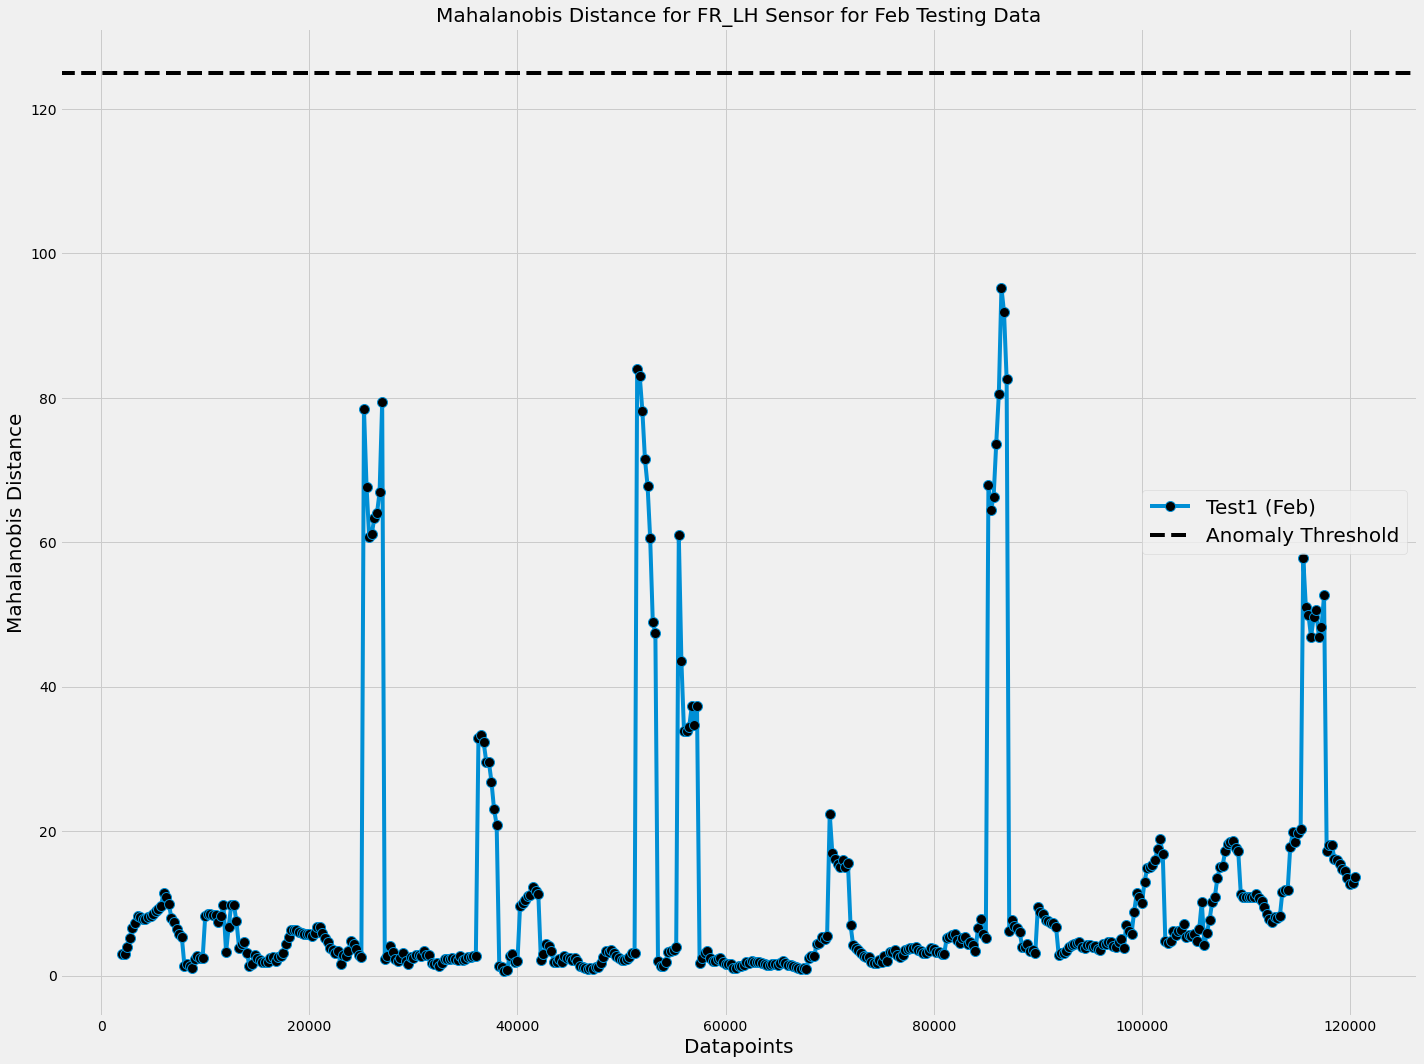

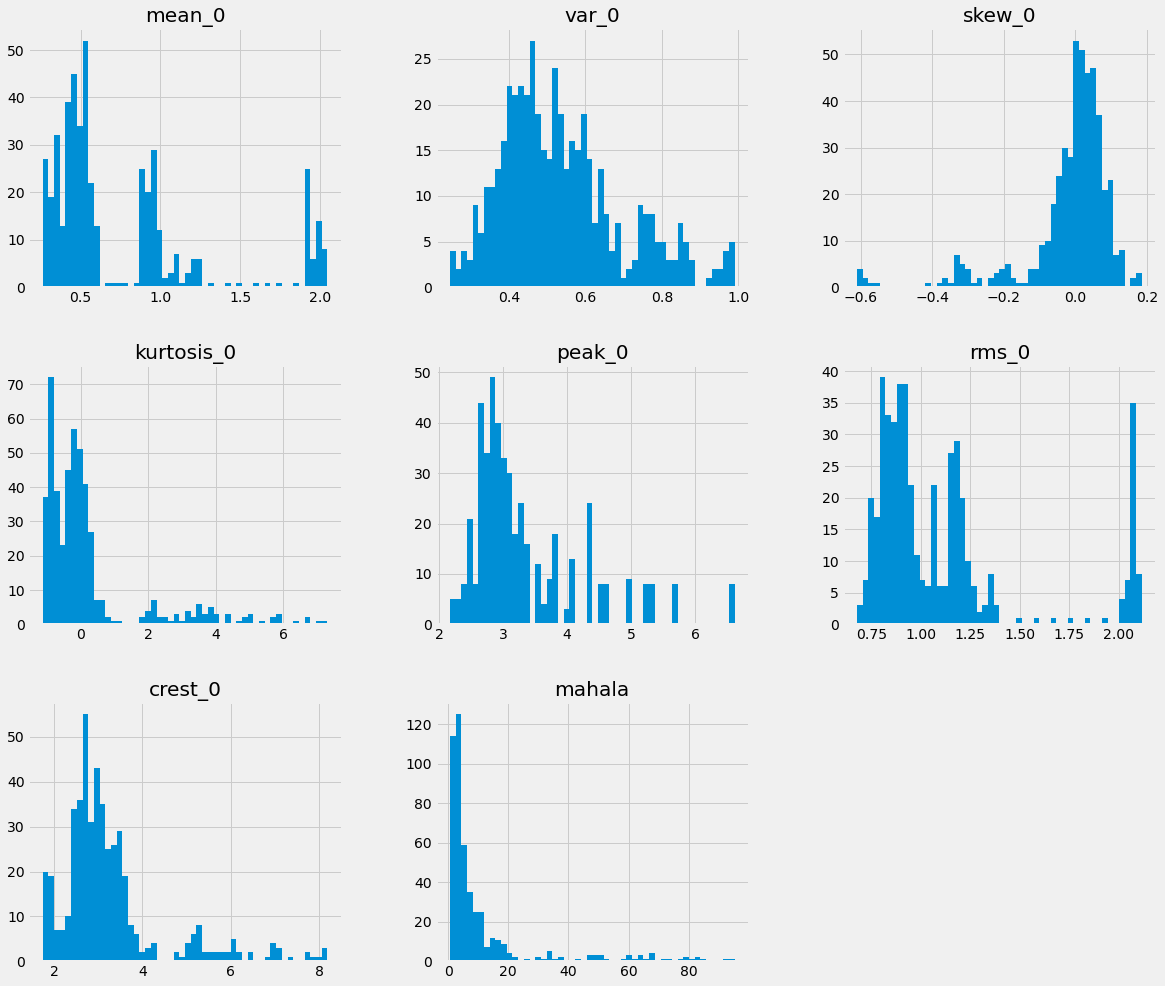

In [68]:
plt.style.use('fivethirtyeight')
ax = df_FR_LH['mahala'].plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('Mahalanobis Distance for FR_LH Sensor for Feb Testing Data', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(125, color='k', linestyle='--')
ax.legend(("Test1 (Feb)", "Anomaly Threshold"), fontsize=20)
plt.tight_layout()

df_FR_LH.hist(bins=50, figsize=(18,16))
plt.show()

# Mahalanobis distance calculation for test set 1 for FR_RH sensor comparing with mean and covariance values of train (reference) set

In [71]:
df_FR_RH = data_new_FR_RH[['mean_1', 'var_1', 'skew_1', 'kurtosis_1', 'peak_1', 'rms_1', 'crest_1']]
df_FR_RH['mahala'] = mahalanobis(x=df_FR_RH, data=data_vib_FR_RH[['mean_1', 'var_1', 'skew_1', 'kurtosis_1', 'peak_1', 'rms_1', 'crest_1']])
df_FR_RH = pd.concat([data_new_FR_RH['DateTime'], df_FR_RH], axis =1)
df_FR_RH_asc = df_FR_RH.sort_values(by=['mahala'], ascending=False)
df_FR_RH_asc

C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DateTime    mean_1     var_1    skew_1  kurtosis_1  \
55499  2020-02-25 15:46:18.355  0.231250  0.326890  0.567641    7.581838   
86499  2020-02-25 16:35:06.905  0.410839  0.432868  0.419603    9.413095   
11249  2020-02-25 15:05:25.565  0.263366  0.378973  0.541944    9.177463   
86749  2020-02-25 16:35:08.155  0.417428  0.441710  0.376666    8.979388   
86249  2020-02-25 16:35:05.655  0.412635  0.443244  0.388013    8.880592   
...                        ...       ...       ...       ...         ...   
59749  2020-02-25 15:46:39.605  0.203587  0.411009 -0.035936   -0.084616   
45749  2020-02-25 15:44:04.635  0.165710  0.413480 -0.043723    0.118281   
58999  2020-02-25 15:46:35.855  0.205498  0.365838 -0.045221   -0.202573   
15249  2020-02-25 15:09:55.010  0.223910  0.364063 -0.048740   -0.097939   
59499  2020-02-25 15:46:38.355  0.201773  0.399836 -0.047922    0.008514   

         peak_1     rms_1   crest_1      mahala  
55499  5.160481  0.616606  8.369170  108.326819  
86499  6.535735  0.775525  8.427495   89.421008  
11249  6.678255  0.669436  9.975942   86.112523  
86749  6.535735  0.784688  8.329091   76.725562  
86249  6.535735  0.783128  8.345679   74.512559  
...         ...       ...       ...         ...  
59749  2.344791  0.672496  3.486696    0.943443  
45749  2.549772  0.663877  3.840727    0.926920  
58999  2.083386  0.638659  3.262128    0.909482  
15249  2.272697  0.643441  3.532100    0.756026  
59499  2.344791  0.663587  3.533508    0.753814  

[475 rows x 9 columns]

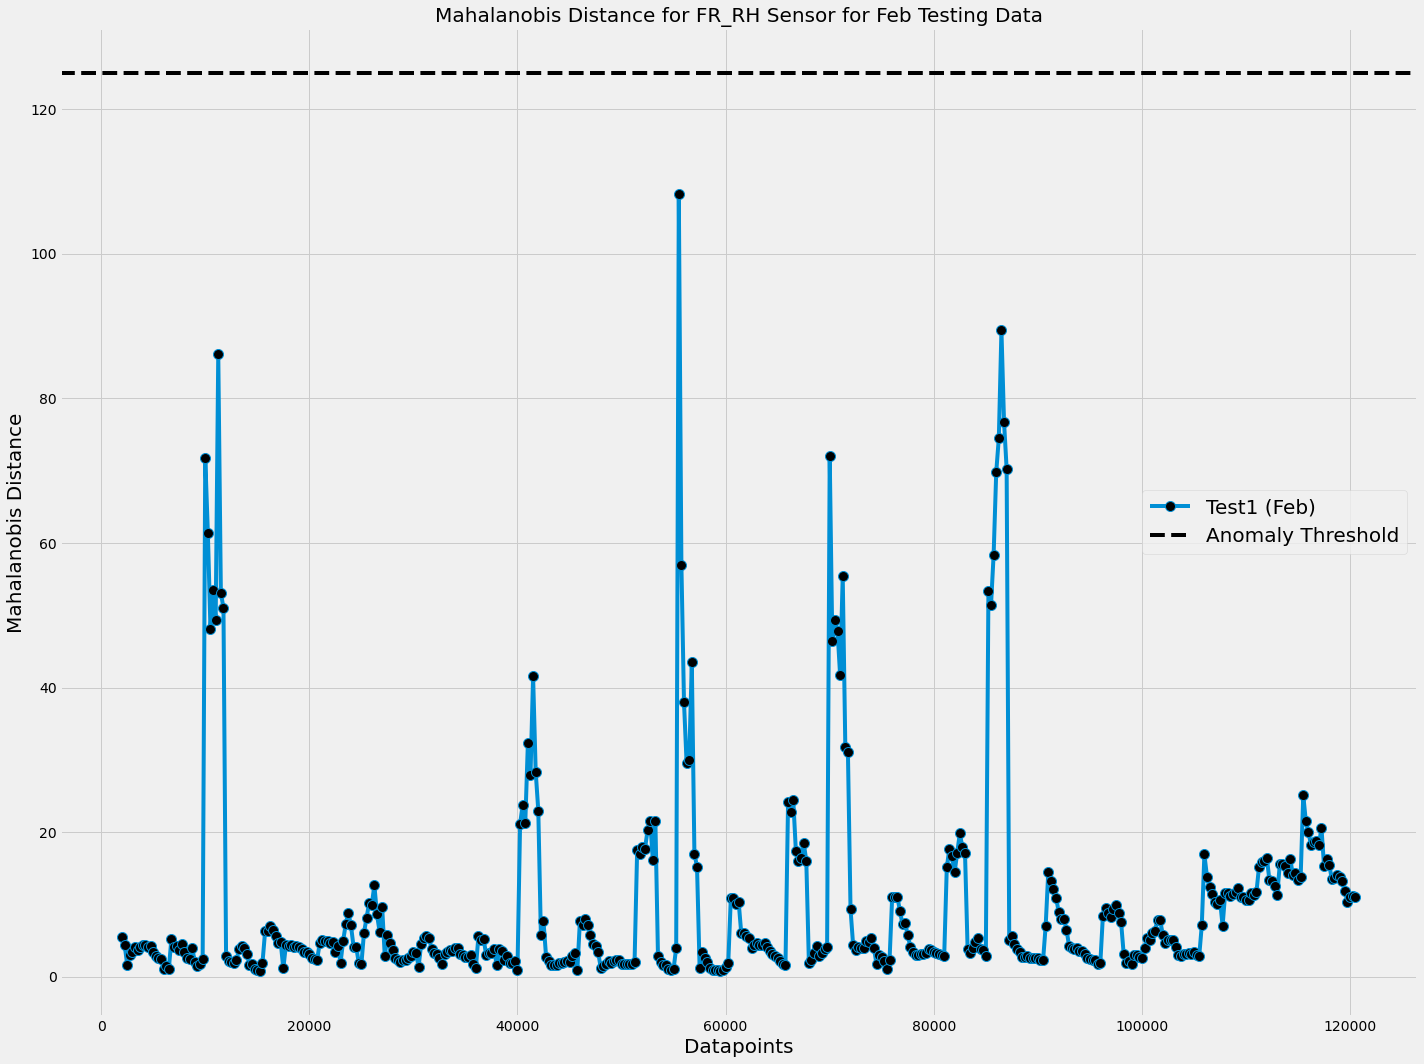

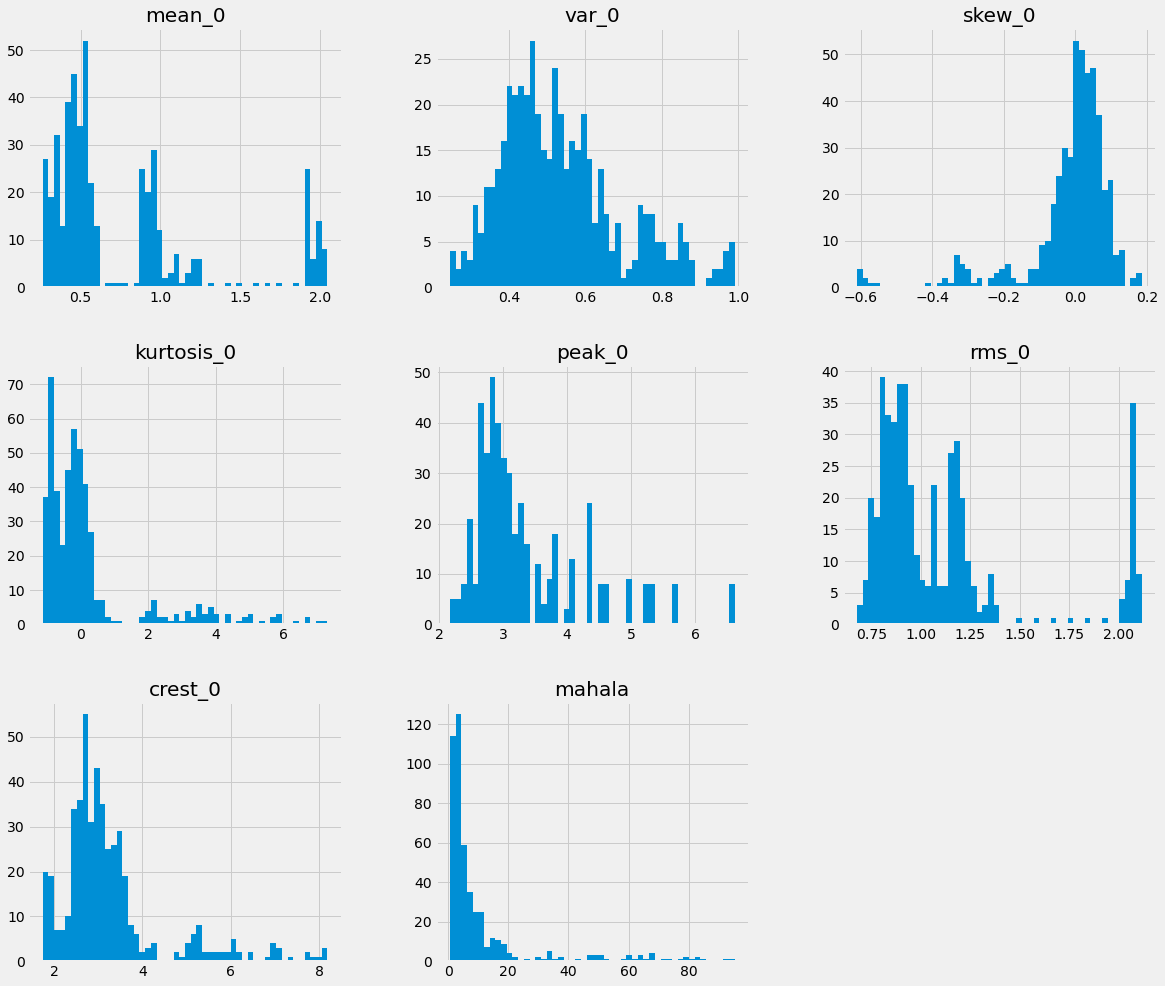

In [73]:
plt.style.use('fivethirtyeight')
ax = df_FR_RH['mahala'].plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('Mahalanobis Distance for FR_RH Sensor for Feb Testing Data', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(125, color='k', linestyle='--')
ax.legend(("Test1 (Feb)", "Anomaly Threshold"), fontsize=20)
plt.tight_layout()

df_FR_LH.hist(bins=50, figsize=(18,16))
plt.show()

C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mahalanobis distance')

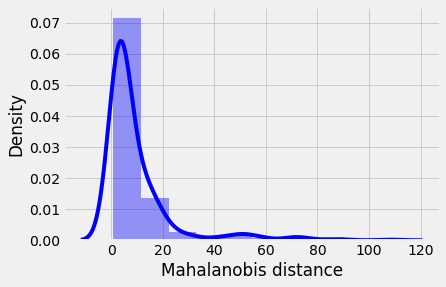

In [74]:
plt.figure()
sns.distplot(df_FR_RH['mahala'],
             bins = 10, 
             kde= True, 
            color = 'blue');
plt.xlabel('Mahalanobis distance')

# Mahalanobis distance calculation for test set 1 for RR_LH sensor comparing with mean and covariance values of train (reference) set

In [75]:
df_RR_LH = data_new_RR_LH[['mean_2', 'var_2', 'skew_2', 'kurtosis_2', 'peak_2', 'rms_2', 'crest_2']]
df_RR_LH['mahala'] = mahalanobis(x=df_RR_LH, data=data_vib_RR_LH[['mean_2', 'var_2', 'skew_2', 'kurtosis_2', 'peak_2', 'rms_2', 'crest_2']])
df_RR_LH = pd.concat([data_new_RR_LH['DateTime'], df_RR_LH], axis =1)
df_RR_LH_asc = df_RR_LH.sort_values(by=['mahala'], ascending=False)
df_RR_LH_asc

C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DateTime    mean_2     var_2    skew_2  kurtosis_2  \
82249  2020-02-25 16:33:20.105  0.036727  0.202096 -0.092393    0.617924   
77749  2020-02-25 16:32:57.605 -0.000288  0.214698 -0.057803    1.993176   
21999  2020-02-25 15:10:28.760 -0.111877  0.280761 -0.402901    1.641182   
82999  2020-02-25 16:33:23.855  0.047294  0.219457 -0.016331    0.500983   
82749  2020-02-25 16:33:22.605  0.045301  0.224315 -0.036352    0.421644   
...                        ...       ...       ...       ...         ...   
42249  2020-02-25 15:32:48.370 -0.655995  0.268875 -0.039809   -0.052703   
31249  2020-02-25 15:30:28.515 -0.387483  0.371974  0.008254    0.036561   
39249  2020-02-25 15:31:08.515 -0.617775  0.300286 -0.053514    0.070523   
31749  2020-02-25 15:30:31.015 -0.500675  0.303801  0.033994    0.370543   
31499  2020-02-25 15:30:29.765 -0.440303  0.340420  0.022533    0.194560   

         peak_2     rms_2   crest_2     mahala  
82249  2.539031  0.450936  5.630574  78.840605  
77749  2.540084  0.463239  5.483306  66.249234  
21999  3.249606  0.541422  6.001989  65.785441  
82999  2.539031  0.470727  5.393850  59.875924  
82749  2.539031  0.475663  5.337876  56.501536  
...         ...       ...       ...        ...  
42249  2.396495  0.836105  2.866263   1.277741  
31249  2.391524  0.722448  3.310305   1.218827  
39249  2.581404  0.825701  3.126319   1.122607  
31749  2.391524  0.744529  3.212128   0.834548  
31499  2.391524  0.730832  3.272329   0.737489  

[475 rows x 9 columns]

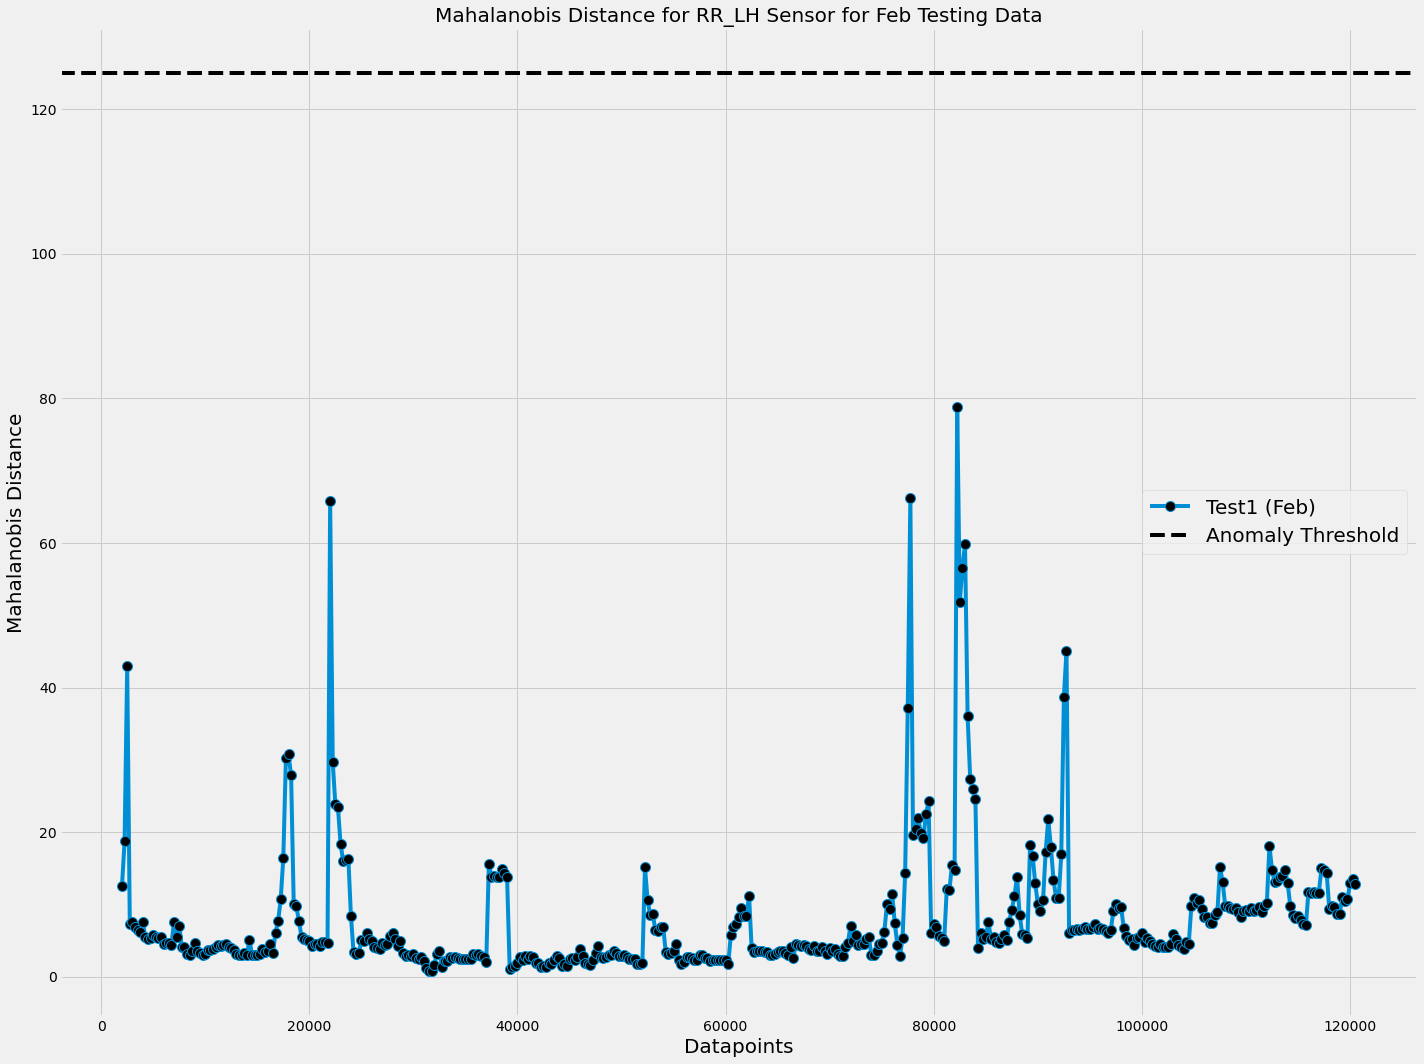

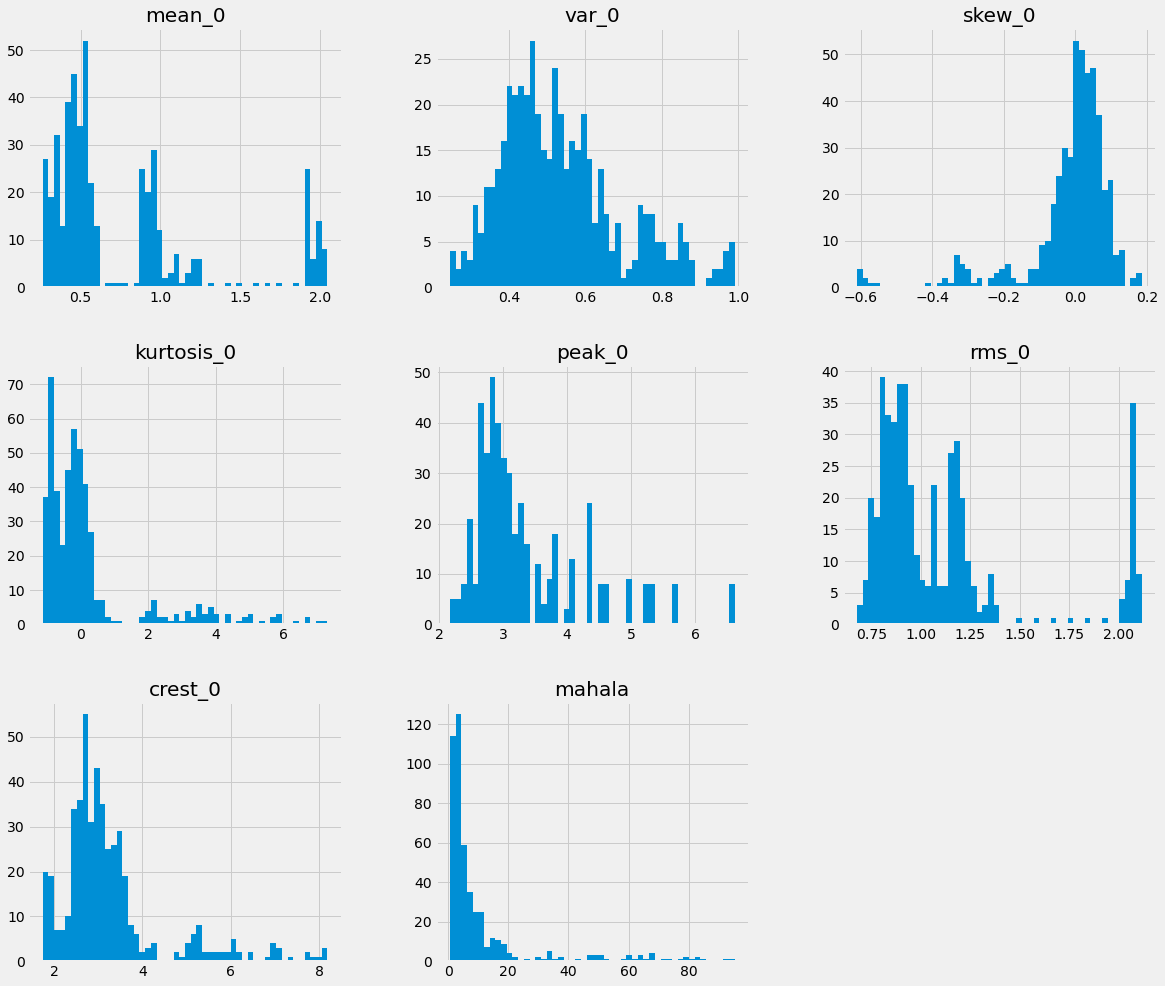

In [76]:
plt.style.use('fivethirtyeight')
ax = df_RR_LH['mahala'].plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('Mahalanobis Distance for RR_LH Sensor for Feb Testing Data', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(125, color='k', linestyle='--')
ax.legend(("Test1 (Feb)", "Anomaly Threshold"), fontsize=20)
plt.tight_layout()

df_FR_LH.hist(bins=50, figsize=(18,16))
plt.show()

# Mahalanobis distance calculation for test set 1 for RR_RH sensor comparing with mean and covariance values of train (reference) set

In [77]:
df_RR_RH = data_new_RR_RH[['mean_3', 'var_3', 'skew_3', 'kurtosis_3', 'peak_3', 'rms_3', 'crest_3']]
df_RR_RH['mahala'] = mahalanobis(x=df_RR_RH, data=data_vib_RR_RH[['mean_3', 'var_3', 'skew_3', 'kurtosis_3', 'peak_3', 'rms_3', 'crest_3']])
df_RR_RH = pd.concat([data_new_RR_RH['DateTime'], df_RR_RH], axis =1)
df_RR_RH_asc = df_RR_RH.sort_values(by=['mahala'], ascending=False)
df_RR_RH_asc

C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DateTime    mean_3     var_3    skew_3  kurtosis_3  \
77499  2020-02-25 16:32:56.355  0.129850  0.227142  0.113446    1.605219   
77749  2020-02-25 16:32:57.605  0.138884  0.195021  0.042288    1.149760   
2249   2020-02-25 15:03:15.670 -0.097837  0.258274 -0.087954    1.442259   
77249  2020-02-25 16:32:55.105  0.123539  0.315325 -0.196362    1.573168   
86749  2020-02-25 16:35:08.155  0.030409  0.186155  0.014828    0.007390   
...                        ...       ...       ...       ...         ...   
50999  2020-02-25 15:44:30.885  0.918859  0.205918 -0.118540   -0.014189   
50749  2020-02-25 15:44:29.635  0.921185  0.203375 -0.116980   -0.021211   
55749  2020-02-25 15:46:19.605  1.008062  0.239710 -0.070695   -0.296219   
51499  2020-02-25 15:44:33.385  0.927443  0.201749 -0.097992   -0.050350   
59499  2020-02-25 15:46:38.355  1.039842  0.258040  0.026901   -0.074457   

         peak_3     rms_3   crest_3     mahala  
77499  2.846493  0.493851  5.763864  93.775474  
77749  2.335259  0.462831  5.045600  56.044959  
2249   2.576294  0.517414  4.979176  43.708948  
77249  2.846493  0.574829  4.951892  36.582497  
86749  1.927269  0.432420  4.456943  32.996063  
...         ...       ...       ...        ...  
50999  2.398719  1.024752  2.340779   1.291417  
50749  2.398719  1.025600  2.338844   1.282278  
55749  2.496769  1.120615  2.228034   1.265566  
51499  2.398719  1.030436  2.327867   1.207876  
59499  2.700670  1.157230  2.333736   1.111618  

[475 rows x 9 columns]

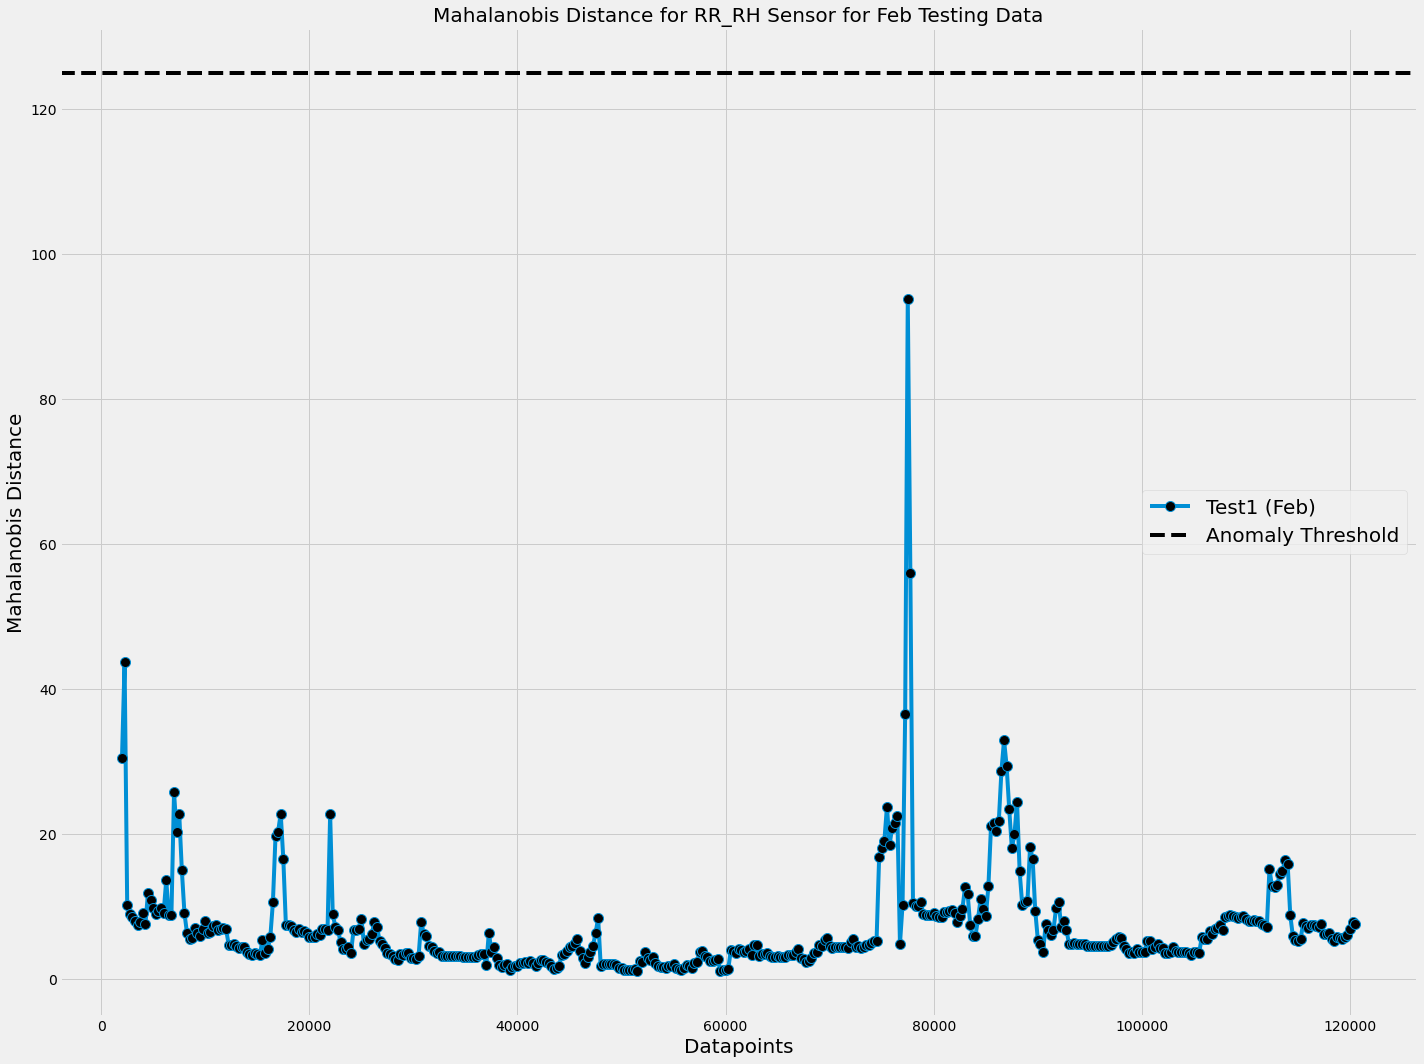

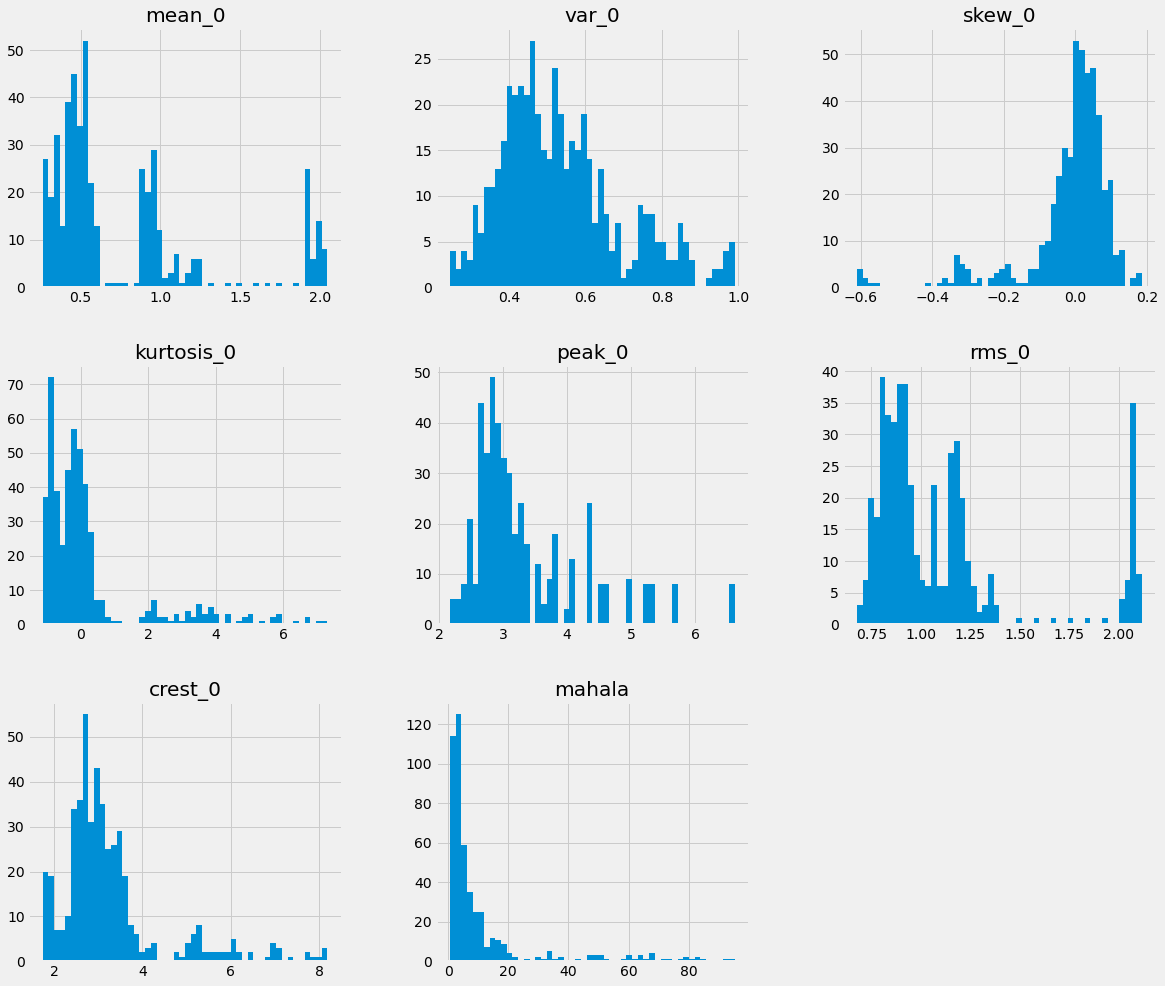

In [78]:
plt.style.use('fivethirtyeight')
ax = df_RR_RH['mahala'].plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('Mahalanobis Distance for RR_RH Sensor for Feb Testing Data', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(125, color='k', linestyle='--')
ax.legend(("Test1 (Feb)", "Anomaly Threshold"), fontsize=20)
plt.tight_layout()

df_FR_LH.hist(bins=50, figsize=(18,16))
plt.show()

# Mahalanobis distance calculation for test set 1 for Cabin sensor comparing with mean and covariance values of train (reference) set

In [79]:
df_Cabin = data_new_Cabin[['mean_4', 'var_4', 'skew_4', 'kurtosis_4', 'peak_4', 'rms_4', 'crest_4']]
df_Cabin['mahala'] = mahalanobis(x=df_Cabin, data=data_vib_Cabin[['mean_4', 'var_4', 'skew_4', 'kurtosis_4', 'peak_4', 'rms_4', 'crest_4']])
df_Cabin = pd.concat([data_new_Cabin['DateTime'], df_Cabin], axis =1)
df_Cabin_asc = df_Cabin.sort_values(by=['mahala'], ascending=False)
df_Cabin_asc

C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DateTime    mean_4     var_4    skew_4  kurtosis_4  \
115499  2020-02-25 17:10:16.405 -0.092672  0.276777 -0.430243    4.966348   
116749  2020-02-25 17:10:22.655 -0.144648  0.290112 -0.234810    4.500760   
111499  2020-02-25 17:08:31.730 -0.158501  0.271546 -0.073589   -0.030982   
112249  2020-02-25 17:08:35.480 -0.153517  0.290054 -0.419288    0.928110   
112499  2020-02-25 17:08:36.730 -0.151371  0.301752 -0.379766    0.821684   
...                         ...       ...       ...       ...         ...   
51999   2020-02-25 15:44:35.885  0.110897  0.282564 -0.088332    0.172850   
102999  2020-02-25 16:53:24.835 -0.042160  0.264398 -0.054330    0.124106   
51499   2020-02-25 15:44:33.385  0.111985  0.285119 -0.064682    0.185670   
62249   2020-02-25 16:09:02.590 -0.001617  0.324424 -0.075789    0.393346   
103249  2020-02-25 16:53:26.085 -0.035251  0.270351 -0.043521    0.076235   

          peak_4     rms_4   crest_4     mahala  
115499  3.596568  0.534066  6.734312  29.919100  
116749  3.596568  0.557576  6.450369  28.220779  
111499  2.587253  0.544548  4.751190  25.625173  
112249  2.972579  0.559889  5.309225  25.184529  
112499  2.972579  0.569661  5.218151  24.886120  
...          ...       ...       ...        ...  
51999   1.979629  0.542882  3.646516   0.959785  
102999  1.939796  0.515794  3.760795   0.904255  
51499   1.979629  0.545451  3.629342   0.896257  
62249   2.260098  0.569442  3.968967   0.853640  
103249  1.939796  0.521017  3.723094   0.795812  

[475 rows x 9 columns]

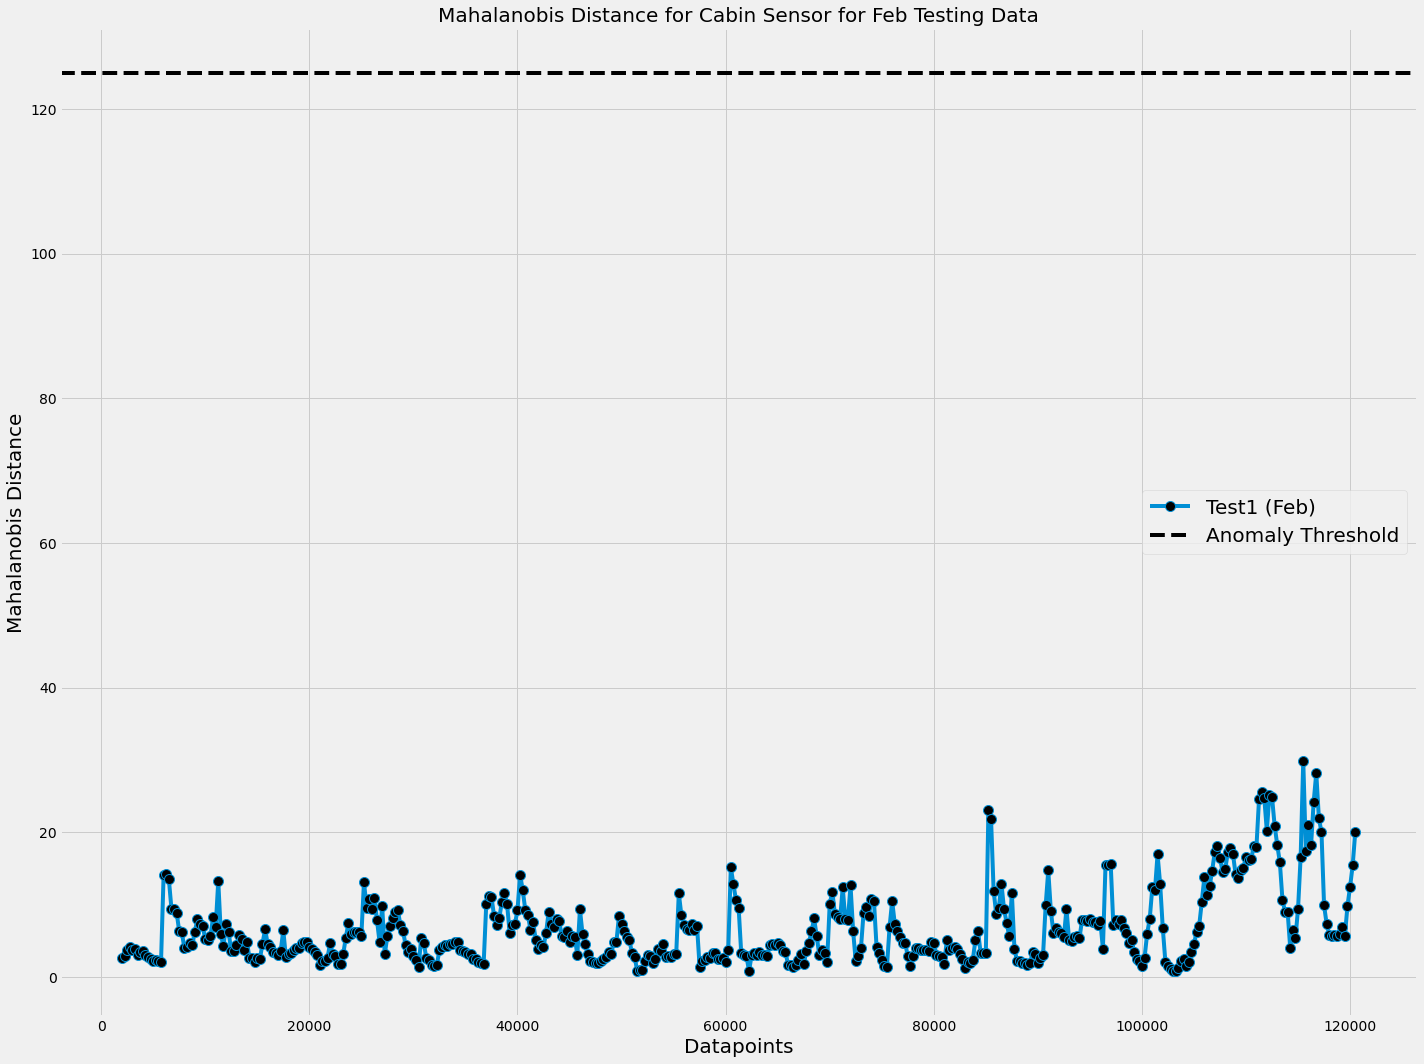

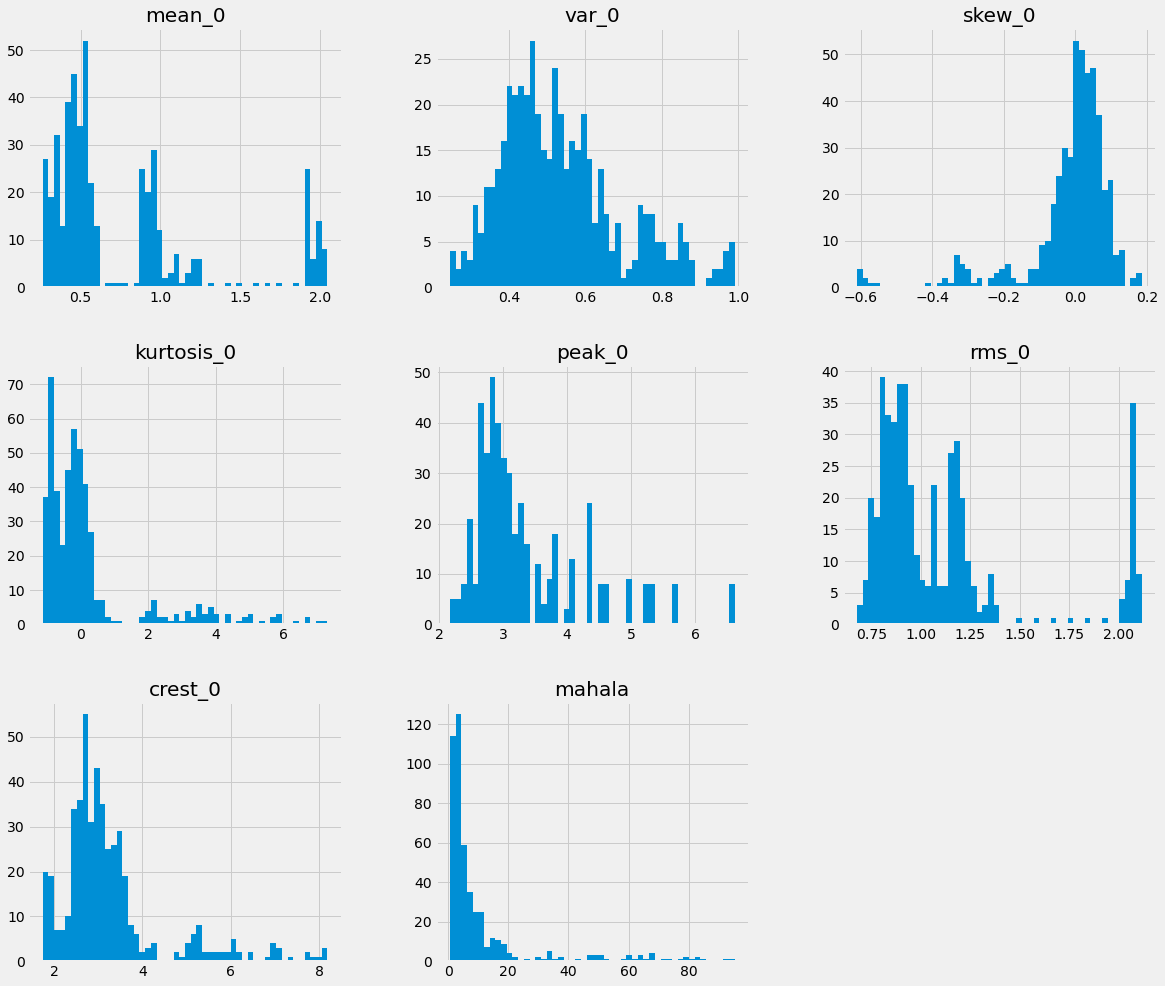

In [80]:
plt.style.use('fivethirtyeight')
ax = df_Cabin['mahala'].plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('Mahalanobis Distance for Cabin Sensor for Feb Testing Data', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(125, color='k', linestyle='--')
ax.legend(("Test1 (Feb)", "Anomaly Threshold"), fontsize=20)
plt.tight_layout()

df_FR_LH.hist(bins=50, figsize=(18,16))
plt.show()

# Mahalanobis distance calculation visualization for test set 1 for all sensors

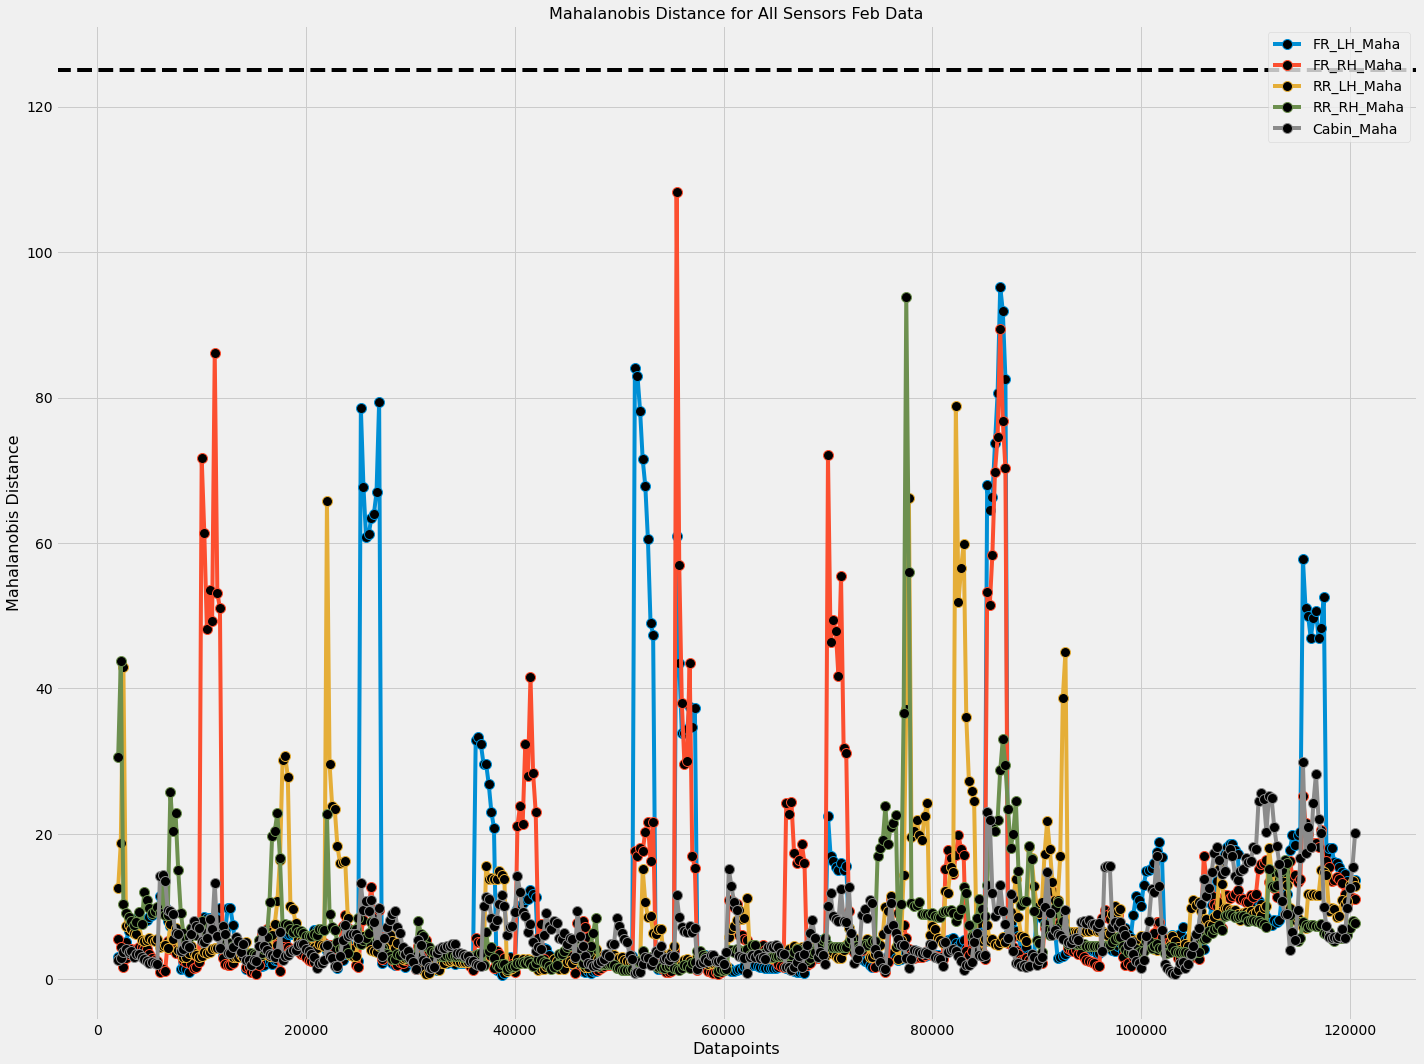

In [112]:
plt.style.use('fivethirtyeight')
feb_comb = pd.concat([df_FR_LH['mahala'],df_FR_RH['mahala'],df_RR_LH['mahala'],df_RR_RH['mahala'],df_Cabin['mahala']], axis=1)
feb_comb.columns = ['FR_LH_Maha','FR_RH_Maha','RR_LH_Maha','RR_RH_Maha','Cabin_Maha']
ax = feb_comb.plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=16)
ax.set_ylabel('Mahalanobis Distance', fontsize=16)
ax.set_title('Mahalanobis Distance for All Sensors Feb Data', fontsize=16)

plt.axhline(125, color='k', linestyle='--')
plt.tight_layout()

In [131]:
feb_comb.to_csv("Output_Data_Files/MahaDist_Smooth_Feb.csv")
feb_comb

FR_LH_Maha  FR_RH_Maha  RR_LH_Maha  RR_RH_Maha  Cabin_Maha
1999      3.035106    5.500883   12.564168   30.511727    2.680369
2249      3.020297    4.444809   18.707858   43.708948    2.882783
2499      3.971946    1.686327   42.948363   10.316349    3.731368
2749      5.182291    2.985793    7.341219    9.088956    4.202125
2999      6.648705    3.448825    7.530641    8.594517    3.789946
...            ...         ...         ...         ...         ...
119499   14.441679   11.800735   10.403220    5.857023    5.710353
119749   13.506702   10.391715   10.713084    6.077729    9.876943
119999   12.731277   11.095947   12.949959    7.010455   12.506903
120249   12.798634   11.161687   13.525735    7.963021   15.487092
120499   13.652009   11.027353   12.867722    7.685672   20.116447

[475 rows x 5 columns]

# Similar analysis is done for March data refered to as test2 data to derive mahalanobis distances for each sensor values in test 2 dataset and is used in further analysis for comparison between test 1 and test 2 datasets

# Compare & plot mahalanobis distances for both test sets (test 1 & test 2)

In [132]:
test1 = pd.read_csv('Output_Data_Files/MahaDist_Smooth_Feb.csv', index_col=0)
test1

FR_LH_Maha  FR_RH_Maha  RR_LH_Maha  RR_RH_Maha  Cabin_Maha
1999      3.035106    5.500883   12.564168   30.511727    2.680369
2249      3.020297    4.444809   18.707858   43.708948    2.882783
2499      3.971946    1.686327   42.948363   10.316349    3.731368
2749      5.182291    2.985793    7.341219    9.088956    4.202125
2999      6.648705    3.448825    7.530641    8.594517    3.789946
...            ...         ...         ...         ...         ...
119499   14.441679   11.800735   10.403220    5.857023    5.710353
119749   13.506702   10.391715   10.713084    6.077729    9.876943
119999   12.731277   11.095947   12.949959    7.010455   12.506903
120249   12.798634   11.161687   13.525735    7.963021   15.487092
120499   13.652009   11.027353   12.867722    7.685672   20.116447

[475 rows x 5 columns]

In [133]:
test2=pd.read_csv('Output_Data_Files/MahaDist_Smooth_March.csv', index_col=0)
test2

FR_LH_Maha   FR_RH_Maha  RR_LH_Maha  RR_RH_Maha  Cabin_Maha
1999      3.003188    56.386123   12.772504   32.006773  392.430739
2249      2.973885    56.770539   17.822803   10.627061  392.082606
2499      2.839458    54.468342    5.829354   11.538137  407.215732
2749      2.856815    62.144089    6.635614   11.910591  379.818481
2999      3.104919    61.243231    6.830028   12.230784  401.526516
...            ...          ...         ...         ...         ...
120999  626.147223  1653.123164   34.025015  138.247508   91.888064
121249  631.317811  1649.631514   35.823638  144.285700   96.764061
121499  629.965988  1637.568266   36.295428  149.558351  117.266759
121749  624.589908  1619.426805   37.465526  158.345049  119.293701
121999  613.975562  1517.213543   34.879838  171.619514  137.036727

[481 rows x 5 columns]

In [92]:
Maha_both = pd.concat([test1,test2], axis=1)
Maha_both.columns = ['FR_LH_Feb','FR_RH_Feb','RR_LH_Feb','RR_RH_Feb','Cabin_Feb','FR_LH_March','FR_RH_March','RR_LH_March','RR_RH_March','Cabin_March']
Maha_both

FR_LH_Feb  FR_RH_Feb  RR_LH_Feb  RR_RH_Feb  Cabin_Feb  FR_LH_March  \
1999     3.035106   5.500883  12.564168  30.511727   2.680369     3.003188   
2249     3.020297   4.444809  18.707858  43.708948   2.882783     2.973885   
2499     3.971946   1.686327  42.948363  10.316349   3.731368     2.839458   
2749     5.182291   2.985793   7.341219   9.088956   4.202125     2.856815   
2999     6.648705   3.448825   7.530641   8.594517   3.789946     3.104919   
...           ...        ...        ...        ...        ...          ...   
120999        NaN        NaN        NaN        NaN        NaN   626.147223   
121249        NaN        NaN        NaN        NaN        NaN   631.317811   
121499        NaN        NaN        NaN        NaN        NaN   629.965988   
121749        NaN        NaN        NaN        NaN        NaN   624.589908   
121999        NaN        NaN        NaN        NaN        NaN   613.975562   

        FR_RH_March  RR_LH_March  RR_RH_March  Cabin_March  
1999      56.386123    12.772504    32.006773   392.430739  
2249      56.770539    17.822803    10.627061   392.082606  
2499      54.468342     5.829354    11.538137   407.215732  
2749      62.144089     6.635614    11.910591   379.818481  
2999      61.243231     6.830028    12.230784   401.526516  
...             ...          ...          ...          ...  
120999  1653.123164    34.025015   138.247508    91.888064  
121249  1649.631514    35.823638   144.285700    96.764061  
121499  1637.568266    36.295428   149.558351   117.266759  
121749  1619.426805    37.465526   158.345049   119.293701  
121999  1517.213543    34.879838   171.619514   137.036727  

[481 rows x 10 columns]

# Plot mahalanobis distances for both test sets (test 1 & test 2) for all sensors

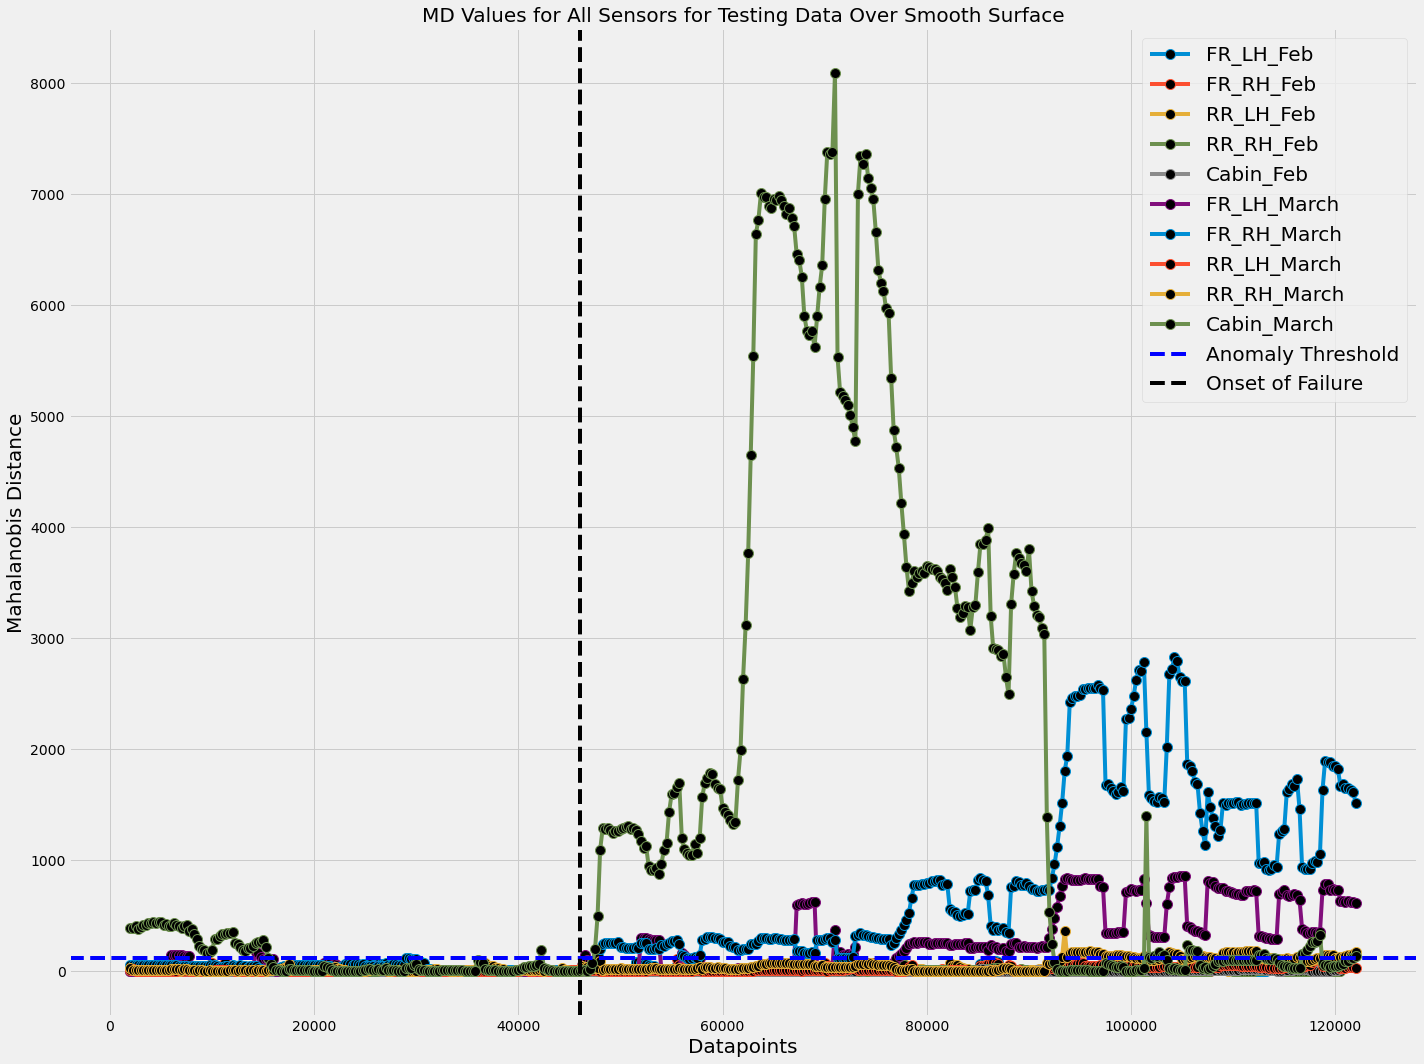

In [98]:
plt.style.use('fivethirtyeight')
ax = Maha_both.plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('MD Values for All Sensors for Testing Data Over Smooth Surface', fontsize=20)
plt.axhline(125, color='blue', linestyle='--', label="threshold")
plt.axvline(46040, color='black', linestyle='--', label="failure")
ax.legend(("FR_LH_Feb", "FR_RH_Feb", "RR_LH_Feb", "RR_RH_Feb", "Cabin_Feb", "FR_LH_March", "FR_RH_March", "RR_LH_March", "RR_RH_March", "Cabin_March", "Anomaly Threshold", "Onset of Failure"), fontsize=20)
plt.tight_layout()

# Plot mahalanobis distances for both test sets (test 1 & test 2) for individual sensors

In [101]:
test_FR_LH = pd.concat([Maha_both['FR_LH_Feb'],Maha_both['FR_LH_March']], axis=1)
test_FR_LH.columns = ['Test1 (Feb)', 'Test2 (March)']

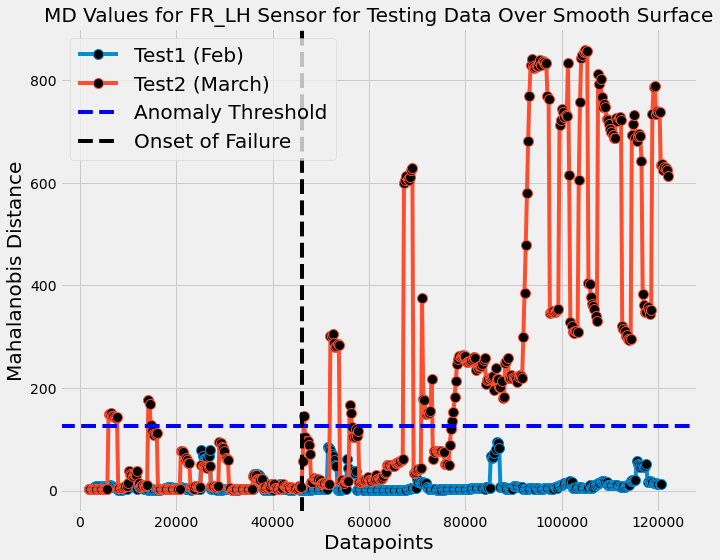

In [113]:
plt.style.use('fivethirtyeight')
ax = test_FR_LH.plot(figsize=(10,8), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('MD Values for FR_LH Sensor for Testing Data Over Smooth Surface', fontsize=20)
plt.axhline(125, color='blue', linestyle='--', label="threshold")
plt.axvline(46040, color='black', linestyle='--', label="failure")
ax.legend(("Test1 (Feb)", "Test2 (March)", "Anomaly Threshold", "Onset of Failure"), fontsize=20)
plt.tight_layout()

In [103]:
test_FR_RH = pd.concat([Maha_both['FR_RH_Feb'],Maha_both['FR_RH_March']], axis=1)
test_FR_RH.columns = ['Test1 (Feb)', 'Test2 (March)']

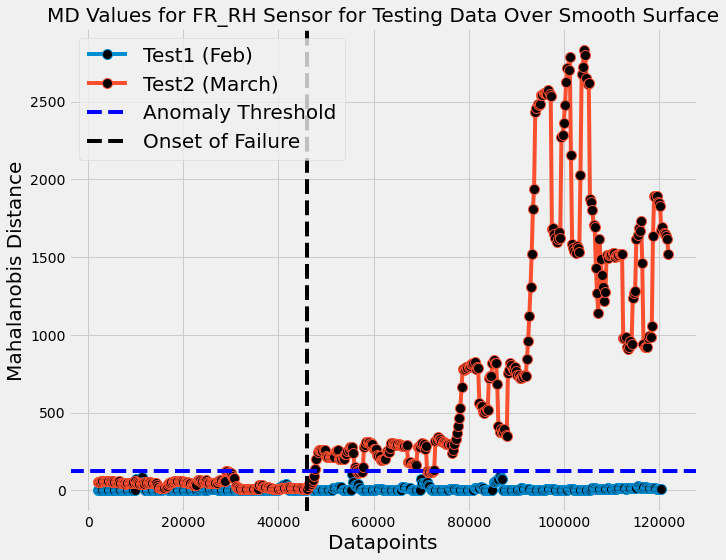

In [114]:
plt.style.use('fivethirtyeight')
ax = test_FR_RH.plot(figsize=(10,8), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('MD Values for FR_RH Sensor for Testing Data Over Smooth Surface', fontsize=20)
plt.axhline(125, color='blue', linestyle='--', label="threshold")
plt.axvline(46040, color='black', linestyle='--', label="failure")
ax.legend(("Test1 (Feb)", "Test2 (March)", "Anomaly Threshold", "Onset of Failure"), fontsize=20)
plt.tight_layout()

In [106]:
test_RR_LH = pd.concat([Maha_both['RR_LH_Feb'],Maha_both['RR_LH_March']], axis=1)
test_RR_LH.columns = ['Test1 (Feb)', 'Test2 (March)']

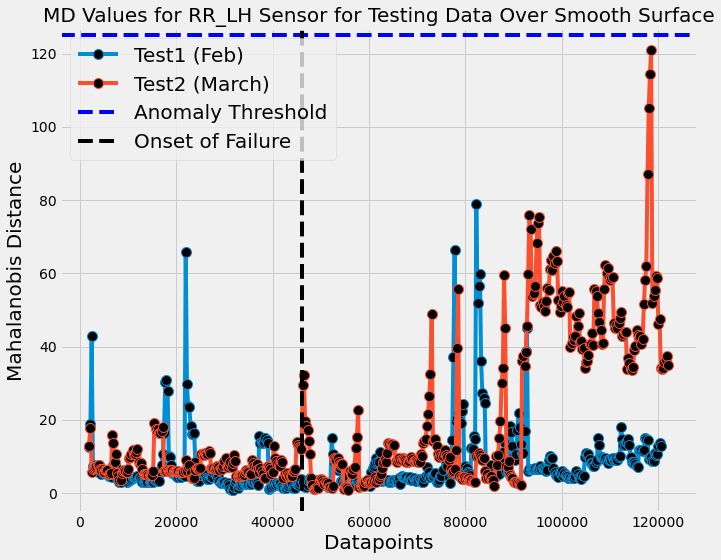

In [115]:
plt.style.use('fivethirtyeight')
ax = test_RR_LH.plot(figsize=(10,8), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('MD Values for RR_LH Sensor for Testing Data Over Smooth Surface', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(125, color='blue', linestyle='--')
plt.axvline(46040, color='black', linestyle='--')
ax.legend(("Test1 (Feb)", "Test2 (March)", "Anomaly Threshold", "Onset of Failure"), fontsize=20)
plt.tight_layout()

In [108]:
test_RR_RH = pd.concat([Maha_both['RR_RH_Feb'],Maha_both['RR_RH_March']], axis=1)
test_RR_RH.columns = ['Test1 (Feb)', 'Test2 (March)']

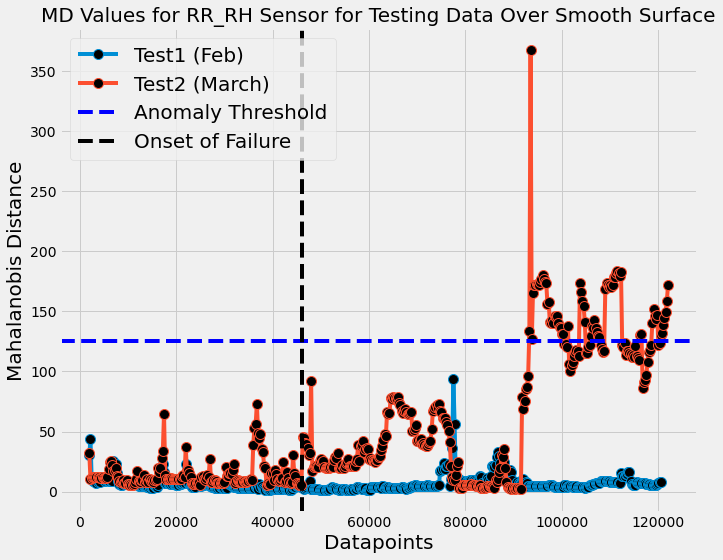

In [109]:
plt.style.use('fivethirtyeight')
ax = test_RR_RH.plot(figsize=(10,8), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('MD Values for RR_RH Sensor for Testing Data Over Smooth Surface', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(125, color='blue', linestyle='--')
plt.axvline(46040, color='black', linestyle='--')
ax.legend(("Test1 (Feb)", "Test2 (March)", "Anomaly Threshold", "Onset of Failure"), fontsize=20)
plt.tight_layout()

In [110]:
test_Cabin = pd.concat([Maha_both['Cabin_Feb'],Maha_both['Cabin_March']], axis=1)
test_Cabin.columns = ['Test1 (Feb)', 'Test2 (March)']

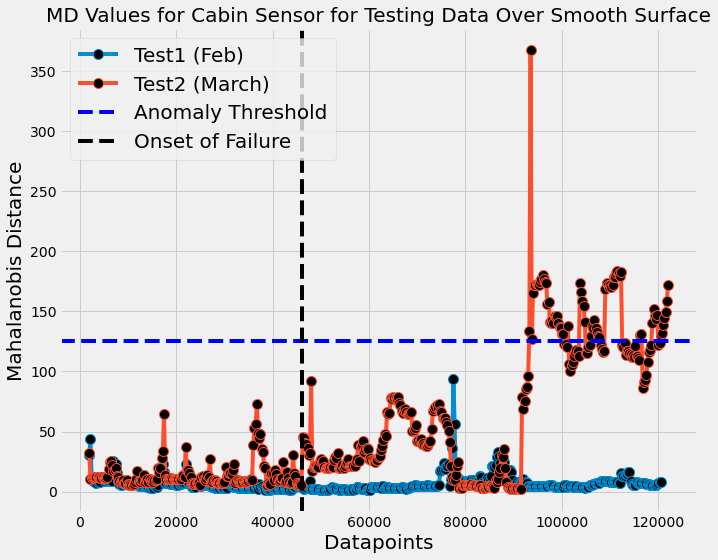

In [116]:
plt.style.use('fivethirtyeight')
ax = test_RR_RH.plot(figsize=(10,8), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Mahalanobis Distance', fontsize=20)
ax.set_title('MD Values for Cabin Sensor for Testing Data Over Smooth Surface', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(125, color='blue', linestyle='--')
plt.axvline(46040, color='black', linestyle='--')
ax.legend(("Test1 (Feb)", "Test2 (March)", "Anomaly Threshold", "Onset of Failure"), fontsize=20)
plt.tight_layout()